# PISA dataset exploration
  ## by Ana Sudame

### Preliminary wrangling

This document explores the pisa data survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
#Import all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

Initially I tried loading all the data at once but then realized that it is taking a long time and is not working out and that 
I need to break it down in chunks for easier processing.

In [2]:
#Load the larger data in chunks 
df_chunk= pd.read_csv("pisa2012.csv", encoding= 'latin-1',error_bad_lines=False, index_col=False, dtype='unicode', 
                iterator= True,chunksize= 30000)

In [4]:
#Getting the column names from the pisa dict
pisa_dict = pd.read_csv('pisadict2012.csv', encoding='latin-1')
new_pisa_names = ['']
for row in pisa_dict['x']:
    new_pisa_names.append(row)


In [5]:
new_pisa_names

['',
 'Country code 3-character',
 'Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)',
 'Stratum ID 7-character (cnt + region ID + original stratum ID)',
 'OECD country',
 'National Centre 6-digit Code',
 'School ID 7-digit (region ID + stratum ID + 3-digit school ID)',
 'Student ID',
 'International Grade',
 'National Study Programme',
 'Birth - Month',
 'Birth -Year',
 'Gender',
 'Attend <ISCED 0>',
 'Age at <ISCED 1>',
 'Repeat - <ISCED 1>',
 'Repeat - <ISCED 2>',
 'Repeat - <ISCED 3>',
 'Truancy - Late for School',
 'Truancy - Skip whole school day',
 'Truancy - Skip classes within school day',
 'At Home - Mother',
 'At Home - Father',
 'At Home - Brothers',
 'At Home - Sisters',
 'At Home - Grandparents',
 'At Home - Others',
 'Mother<Highest Schooling>',
 'Mother Qualifications - <ISCED level 6>',
 'Mother Qualifications - <ISCED level 5A>',
 'Mother Qualifications - <ISCED level 5B>',
 'Mother Qualifications - <ISCED level 4>',
 'Mother Cu

In [6]:
#Collect the data for few columns based on the features needed
attrib_student= ['Country code 3-character','OECD country','Student ID','Gender','Truancy - Skip whole school day',
             'Mother Current Job Status','Father Current Job Status','Possessions - Internet',
              'Math Interest - Enjoy Maths','Math Interest - Look Forward to Lessons',
             'Instrumental Motivation - Important for Future Study','Instrumental Motivation - Helps to Get a Job',
              'Math Anxiety - Worry That It Will Be Difficult',
             'Math Self-Concept - Learn Quickly',
                 'Perceived Control - Doing Well is Completely Up to Me',
                 'Perceived Control - Perform Poorly Regardless',
              'Attributions to Failure - Material Too Hard', 
                 'Attributions to Failure - Teacher Didnt Get Students Interested',              
              'Math Work Ethic - Homework Completed in Time',
                 'Math Work Ethic - Prepared for Exams',
              'Math Work Ethic - Pay Attention in Classes',
              'Math Behaviour - Study More Than 2 Extra Hours a Day',
              'Math Behaviour - <Extracurricular> Activity',
                 'Math Behaviour - Help Friends with Maths',
              'Out of school lessons - <maths>',
              'No of <class period> p/wk - <Maths>',
                 'Min in <class period> - <Maths>',
                 'Attitude towards School - Waste of Time',
                  'Attitude towards School - Does Little to Prepare Me for Life',
                 'Attitude toward School - Prepare for College',
                 'Perseverance - Give up easily',
                  'Perseverance - Exceed expectations',
                 'Perseverance - Remain interested',
                 'Openness for Problem Solving - Seek Explanations',
                 'Openness for Problem Solving - Like to Solve Complex Problems'
                 
                 
             ]

In [7]:
attrib_teacher= ['Country code 3-character','Student ID',
                'Math Teaching - Teacher shows interest',
                 'Math Teaching - Teacher helps',
                'Teacher-Directed Instruction - Sets Clear Goals',
                'Teacher-Directed Instruction - Encourages Thinking and Reasoning',
                'Teacher-Directed Instruction - Checks Understanding',
                'Formative Assessment - Gives Feedback on Strengths and Weaknesses',
                 'Cognitive Activation - Teacher Encourages to Reflect Problems',
                'Cognitive Activation - Helps Learn from Mistakes',
                'Cognitive Activation - Asks for Explanations']

In [8]:
math_vals= ['Country code 3-character','Student ID',
           'Plausible value 1 in mathematics',
           'Plausible value 2 in mathematics',
            'Plausible value 3 in mathematics',
             'Plausible value 4 in mathematics',
             'Plausible value 5 in mathematics',
            'FINAL STUDENT WEIGHT'
]

Below I am making separate dataframes for each aspect of the data: student, teacher, plusible values for math using a for loop
to out each such chunk in their respective dataframes.

In [9]:
#Iterate for each chunk 
student_list = []
teacher_list=[]
math_list =[]
for chunk in df_chunk:
    
    #perform some operation here 
    chunk.columns= new_pisa_names
    
    #Chunk out attributes for students
    chunk_student = chunk.loc[:, attrib_student]
    
    #Chunk out attributes for 
    chunk_teacher= chunk.loc[:, attrib_teacher]
    
    #Chunk out for math scores 
    math_chunk= chunk.loc[:, math_vals]
    
    #Append each chunk to a list
    student_list.append(chunk_student)
    teacher_list.append(chunk_teacher)
    math_list.append(math_chunk)
    
#Concat the list to the respective data frames

df_student = pd.concat(student_list)
df_teacher= pd.concat(teacher_list)
df_math= pd.concat(math_list)
    
    

In [10]:
#df.info()

In [11]:
df_student.shape

(485490, 35)

In [12]:
df_teacher.shape

(485490, 11)

In [13]:
df_math.shape

(485490, 8)

Rename the columns for all the sub data frames.

In [14]:
df_student= df_student.rename(columns={'Country code 3-character':'country','OECD country':'oecd'
                                       ,'Student ID' :'student_id','Gender':'gender',
                                       'Truancy - Skip whole school day':'truancy',
             'Mother Current Job Status':'mother_jobstatus','Father Current Job Status':'father_jobstatus',
                                       'Possessions - Internet':'possess_internet',
              'Math Interest - Enjoy Maths':'matint_enjoys',
                                       'Math Interest - Look Forward to Lessons':'matint_lookforward',
             'Instrumental Motivation - Important for Future Study':'motiv_forfuture',
                                       'Instrumental Motivation - Helps to Get a Job':' motiv_forjob',
              'Math Anxiety - Worry That It Will Be Difficult' :'matanxious_worry',
             'Math Self-Concept - Learn Quickly' :'self_learnquick',
                 'Perceived Control - Doing Well is Completely Up to Me':'control_uptome',
                 'Perceived Control - Perform Poorly Regardless':'control_poorperform',
              'Attributions to Failure - Material Too Hard':'material_hard', 
                 'Attributions to Failure - Teacher Didnt Get Students Interested':'Fail_teachnogood',              
              'Math Work Ethic - Homework Completed in Time':'hwintime',
                                       'Math Work Ethic - Prepared for Exams':'prep_exam',
              'Math Work Ethic - Pay Attention in Classes':'payattn_inclass',
              'Math Behaviour - Study More Than 2 Extra Hours a Day':'extra_study',
              'Math Behaviour - <Extracurricular> Activity':'extra_activ',
                 'Math Behaviour - Help Friends with Maths':'help_friends',
              'Out of school lessons - <maths>':'lesson_outside',
              'No of <class period> p/wk - <Maths>':'numclass_perweek',
             'Min in <class period> - <Maths>' :'min_classperiod',
                 'Attitude towards School - Waste of Time' :'attschool_waste',
                'Attitude towards School - Does Little to Prepare Me for Life':'school_doeslittle',
                 'Attitude toward School - Prepare for College':'attschool_prepcoll',
                 'Perseverance - Give up easily':'perseve_giveup',
                  'Perseverance - Exceed expectations':'perseve_exceedexp',
                 'Perseverance - Remain interested': 'perseve_interest',
                 'Openness for Problem Solving - Seek Explanations':'open_toprobsolve',
                 'Openness for Problem Solving - Like to Solve Complex Problems':'open_solvecomplex'
                 })

In [15]:
df_math= df_math.rename(columns={'Country code 3-character':'country','Student ID':'student_id',
           'Plausible value 1 in mathematics':'pvmat_1',
           'Plausible value 2 in mathematics':'pvmat_2',
            'Plausible value 3 in mathematics':'pvmat_3',
             'Plausible value 4 in mathematics':'pvmat_4',
             'Plausible value 5 in mathematics':'pvmat_5',
            'FINAL STUDENT WEIGHT':'final_weight'})

In [16]:
df_teacher= df_teacher.rename(columns={'Country code 3-character':'country','Student ID':'student_id',
                'Math Teaching - Teacher shows interest':'teacher_showinter',
                 'Math Teaching - Teacher helps':'teacher_helps',
                'Teacher-Directed Instruction - Sets Clear Goals':'teacher_setgoal',
                'Teacher-Directed Instruction - Encourages Thinking and Reasoning':'encourage_think',
                'Teacher-Directed Instruction - Checks Understanding':'check_understand',
                'Formative Assessment - Gives Feedback on Strengths and Weaknesses':'give_feedback',
                 'Cognitive Activation - Teacher Encourages to Reflect Problems':'reflect_onprobs',
                'Cognitive Activation - Helps Learn from Mistakes':'help_learn_mist',
                'Cognitive Activation - Asks for Explanations':'ask_forexplains'})

Now look at each subset individually and merge later

In [17]:
df_math.head()

,country,student_id,pvmat_1,pvmat_2,pvmat_3,pvmat_4,pvmat_5,final_weight
0,Albania,00001,406.8469,376.4683,344.5319,321.1637,381.9209,8.9096
1,Albania,00002,486.1427,464.3325,453.4273,472.9008,476.0165,8.9096
2,Albania,00003,533.2684,481.0796,489.6479,490.4269,533.2684,8.4871
3,Albania,00004,412.2215,498.6836,415.3373,466.7472,454.2842,8.4871
4,Albania,00005,381.9209,328.1742,403.7311,418.5309,395.1628,8.4871


# What is the structure of my dataset ?

There were over 2 million rows in the original data set but I divided this data into three parts: teacher, students and math scores.
Now there are 485490 rows and 636 columns in the PISA dataset.  All variables are string types but some variables like final student weight and plausible values need to be converted to float type. Most of them are categorical variables like the one above : Mother current job status; but some may need ordering like 'Math Interest - Enjoy Maths'. The plausible values are from 1 to 5 for each student for each subject: math, science, reading. We need one score for each subject as a measure of achievement.
There is also a student weight which is needed to be taken into consideration while calculating the score for each student. Since we need to find the weighted average using the 5 plausible scores for each student. (Reference:PISA data analysis manual http://archivos.agenciaeducacion.cl/Manual_de_Analisis_de_datos_SPSS_version_ingles.pdf
and link provided for the PISA competition)

# What is/are the main feature(s) of interest in the dataset?

I am interested in looking at the features that affect the weighted average score for math though this data set contains three
major subject categories.The reason is there are vast number of features that need that can be considered for one subject, math , reading or science  to study the effect of student/ teacher attributes on their achievement scores, I would like to narrow down my focus to one subject area that is, math so that  it will be easier for further analyses in the future. So I will be studying the effects of student behavioural attributes like a student's socio-economic background as in the parent's job status, attitude towards school, instrumental motivation, perseverance and teacher attributes like teacher encouragement, support, feedback etc.

# What features in the dataset will help support my investigation ?

Of the numerous features available in the data set PISA, I would like to investigate the effect of student attributes and teacher's attribute on the achievement of students.
The student attributes like 'Attitude towards school','Math Work ethic','Mathematics behaviour','Perceived control','Perseverance' are good for finding out how well the students do in school and therefore their possibility of doing good in the future. Other social attributes like mother and father job status also can be useful. Gender is also an important feature that will help to see differences in student scores.
Similarly, the teacher's attributes like 'Teacher support','Teacher directed Instruction','Cognitive Activation in Mathematics Lessons' are useful in looking at effect if there is on the achievement scores.


# Univariate distributions

Start with the math data frame

In [18]:
#First inspect the math data
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 8 columns):
country         485490 non-null object
student_id      485490 non-null object
pvmat_1         485490 non-null object
pvmat_2         485490 non-null object
pvmat_3         485490 non-null object
pvmat_4         485490 non-null object
pvmat_5         485490 non-null object
final_weight    485490 non-null object
dtypes: object(8)
memory usage: 29.6+ MB


In [19]:
#Need to convert the variables pv all plausoble math values to numeric 
for col in df_math.columns[2:]:
    df_math[col]= df_math[col].astype(float)
    

In [20]:
#test_dup=df_math[df_math['student_id'].duplicated()]

In [21]:
#test-- means duplicate ids in multiple countries, but unique id per country
#test_dup[test_dup['student_id']=='01971']['country'].duplicated().sum()

In [22]:
#len(test_dup.country.unique())

In [23]:
#Now melt the data frame
#Melting the data frame to calculate the weighted score ahead
math_melted= pd.melt(df_math, id_vars= ['country', 'student_id','final_weight'], var_name = 'pvmath', value_name = 'score')

In [24]:
math_melted.head()

,country,student_id,final_weight,pvmath,score
0,Albania,00001,8.9096,pvmat_1,406.8469
1,Albania,00002,8.9096,pvmat_1,486.1427
2,Albania,00003,8.4871,pvmat_1,533.2684
3,Albania,00004,8.4871,pvmat_1,412.2215
4,Albania,00005,8.4871,pvmat_1,381.9209


In [26]:
#Function to calculate weighted average
def weightavg(data, var, weight):
    """ 
    Helper function to find the weighted average by grouping
    """
    d = data[var]
    w = data[weight]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

Below I am grouping by country and student id since this will be give a math score for each unique student as the student ids are duplicated in multiple countries but not in each country.

I apply the function defined above for calculating the weighted average from the five plausible values given as features in this data to calculate one score for each observation.

In [27]:
#Weighted average of math score for each student--------------take aprrox. 4-5 min to run

math_score= math_melted.groupby(['country','student_id']).apply(weightavg, "score","final_weight" ).reset_index(name="math_score")

In [28]:
#VIOLA !! THE shape of the math_score now is the same as df_math-- now I can merge with df_math
math_score.shape

(485490, 3)

In [29]:
math_score.math_score.describe()

count    485490.000000
mean        469.651234
std         100.786610
min          54.767080
25%         396.019620
50%         465.734520
75%         540.123060
max         903.107960
Name: math_score, dtype: float64

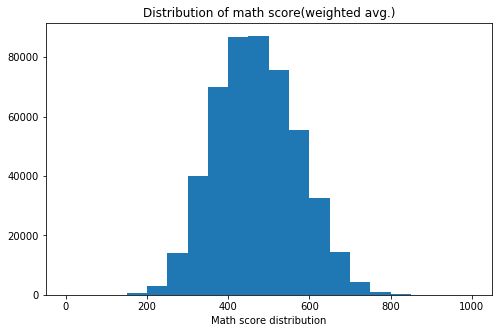

In [249]:
#Lets look at the math score distrubution
#Looking at univariate distribution of main variable of interest: math score
binsize= 50
bins= np.arange(0, math_score['math_score'].max() + 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = math_score, x = 'math_score', bins = bins)
plt.title("Distribution of math score(weighted avg.)")
plt.xlabel('Math score distribution')
plt.show()

The majority of math scores for this data fall between 400 and 600, the max value is above 800. The math score distribution is a
normal curve.


Next look at the student data frame.

In [31]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 35 columns):
country                485490 non-null object
oecd                   485490 non-null object
student_id             485490 non-null object
gender                 485490 non-null object
truancy                479131 non-null object
mother_jobstatus       467751 non-null object
father_jobstatus       451410 non-null object
possess_internet       473182 non-null object
matint_enjoys          314737 non-null object
matint_lookforward     314928 non-null object
motiv_forfuture        315066 non-null object
 motiv_forjob          315232 non-null object
matanxious_worry       313855 non-null object
self_learnquick        312327 non-null object
control_uptome         314182 non-null object
control_poorperform    313470 non-null object
material_hard          312996 non-null object
Fail_teachnogood       312970 non-null object
hwintime               313898 non-null object
prep_exam      

In [32]:
#First convert gender to a category
df_student['gender']= df_student['gender'].astype('category')

Look at the distribution of gender

In [33]:
base_color = sb.color_palette()[0]

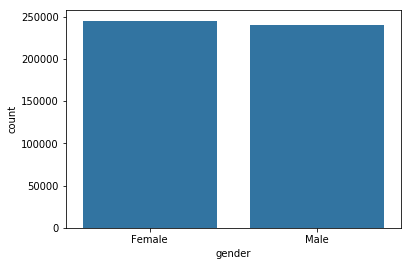

In [34]:
sb.countplot(data=df_student, x='gender', color = base_color);

 Female students are a little higher in number than the male students. It remains to be seen how it differs
        across countries.
 Now lets us look at the student attributes by their counts.       

In [35]:
df_student['extra_study'].value_counts()

Never or rarely            179413
Sometimes                   88330
Often                       30141
Always or almost always     14698
Name: extra_study, dtype: int64

In [36]:
df_student['hwintime'].value_counts()

Agree                148211
Strongly agree        77022
Disagree              70473
Strongly disagree     18192
Name: hwintime, dtype: int64

In [37]:
df_student['perseve_giveup'].value_counts()

Not much like me      109281
Somewhat like me       78831
Not at all like me     67816
Mostly like me         34137
Very much like me      22791
Name: perseve_giveup, dtype: int64

In [38]:
df_student['school_doeslittle'].value_counts()

Disagree             151993
Agree                 74493
Strongly disagree     54064
Strongly agree        30700
Name: school_doeslittle, dtype: int64

In [39]:
df_student['possess_internet'].value_counts()

Yes    402040
No      71142
Name: possess_internet, dtype: int64

In [40]:
#Compare with high attitudes later
df_student['help_friends'].value_counts()# same levels as extra study

Sometimes                  138306
Never or rarely             78062
Often                       72985
Always or almost always     23672
Name: help_friends, dtype: int64

Below create sublpots of 6 student attribute positive and negative attitudes whose categorical levels are the same.

In [41]:
#First loop through each such column to make them categories per the levels ordered
level_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)

#Collect the col names who have same levels as in the level order above
cols =['matint_enjoys','matint_lookforward','motiv_forfuture','payattn_inclass','attschool_waste','attschool_prepcoll',
        'matanxious_worry','school_doeslittle']

for col in df_student[cols]:
    df_student[col] = df_student[col].astype(ordered_cat)

In [42]:
#Now look at the distributions

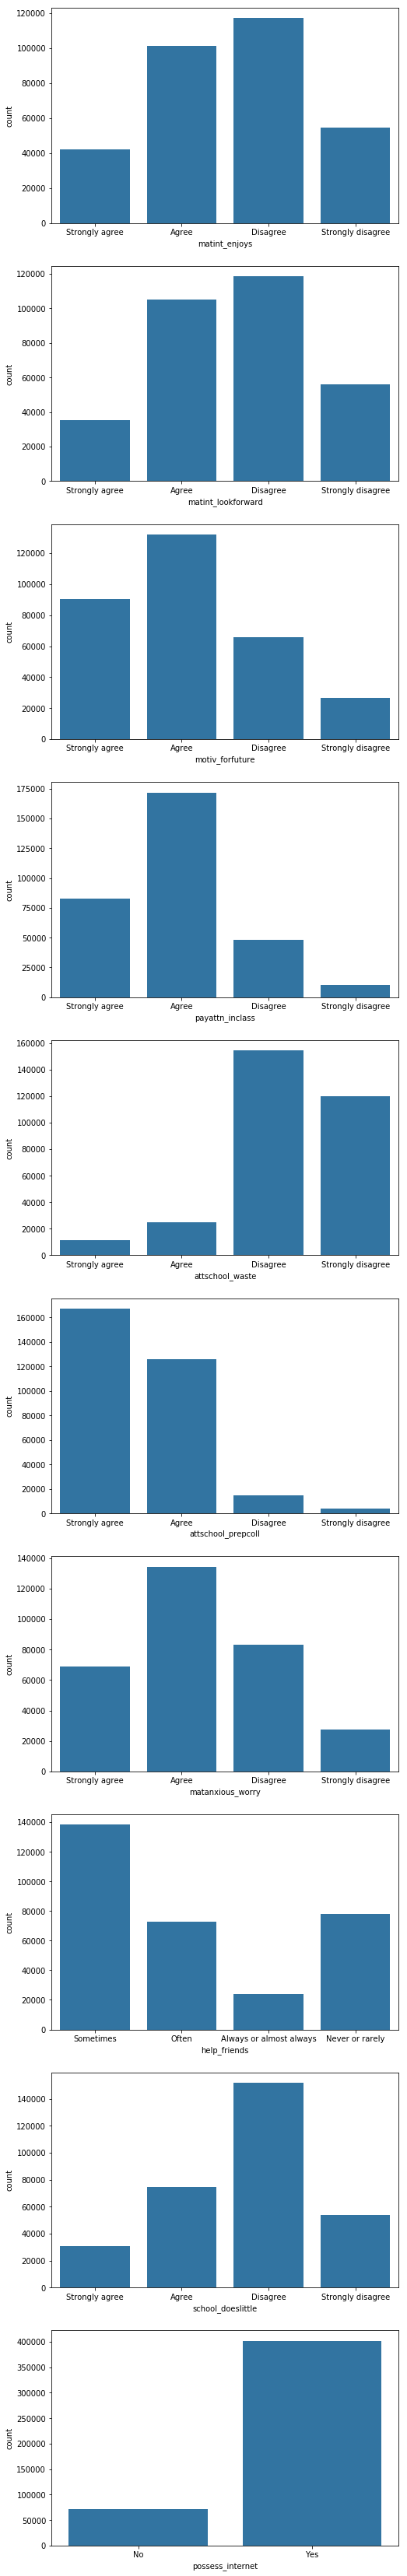

In [211]:
# let's plot all three together to get an idea of each categorical variable's distribution.
fig, ax = plt.subplots(nrows=10, figsize = [8,60])

base_color = sb.color_palette()[0]
sb.countplot(data=df_student, x='matint_enjoys', color = base_color, ax=ax[0]);
sb.countplot(data=df_student, x='matint_lookforward', color = base_color, ax= ax[1]);
sb.countplot(data=df_student, x='motiv_forfuture', color = base_color, ax= ax[2]);
sb.countplot(data=df_student, x= 'payattn_inclass', color = base_color, ax= ax[3]);
sb.countplot(data=df_student, x='attschool_waste' , color = base_color, ax= ax[4]);
sb.countplot(data=df_student, x='attschool_prepcoll' , color = base_color, ax= ax[5]);
sb.countplot(data=df_student, x='matanxious_worry' , color = base_color, ax= ax[6]);
sb.countplot(data= df_student, x= 'help_friends', color =base_color, ax= ax[7]);
sb.countplot(data= df_student, x= 'school_doeslittle', color =base_color, ax= ax[8]);
sb.countplot(data =df_student, x='possess_internet', color =base_color, ax = ax[9]);


plt.show()

From the above plots, one might say that students who have positive behaviors about school/mathstudy in general like paying
attention in class, motivated by learning math, attitude towards school are high in numbers above 100000
than the ones who have don't like math. There are more students who don't enjoy math and who don't look for ward to math lessons. More over, the students who are math anxious are also quite high in number around 1300000. There are also quite a number of students who liked helping friends out about 160000. There is only a small number of students who do not possess internet access.

Lets us compare these with other behavior categorical features who have different levels. So we will plot them
separately.

In [44]:
levels= ['Very much like me','Mostly like me','Somewhat like me','Not much like me','Not at all like me']
order_cat = pd.api.types.CategoricalDtype(ordered = True, categories = levels)

cols=['open_toprobsolve','perseve_exceedexp','perseve_giveup']

for col in df_student[cols]:
    df_student[col] = df_student[col].astype(order_cat)

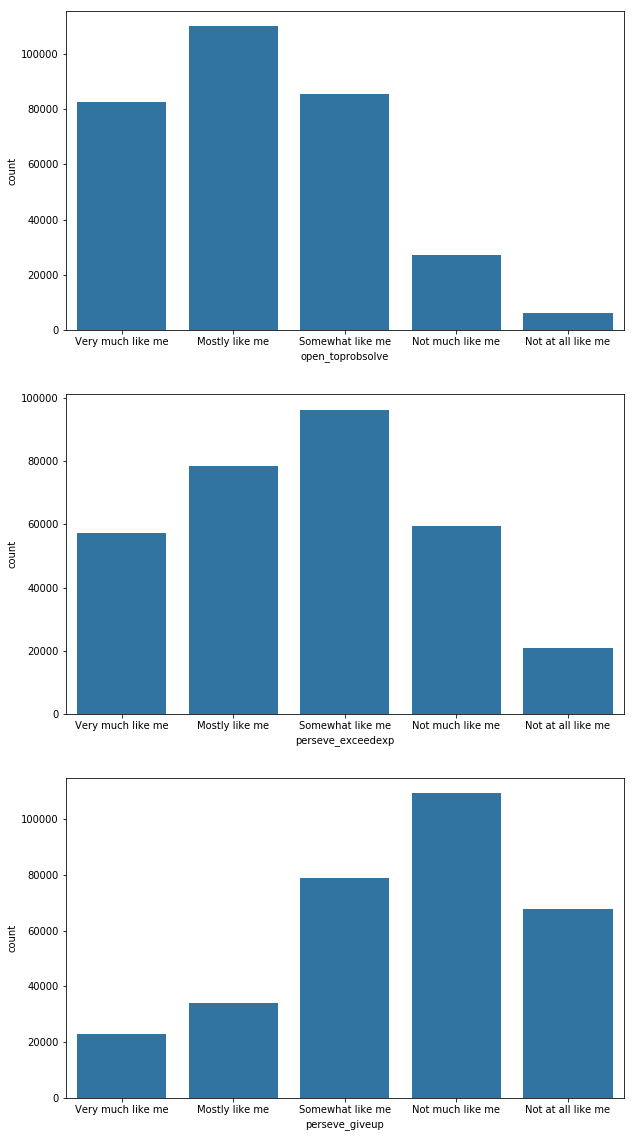

In [45]:
#Plot the above variables
fig, ax = plt.subplots(nrows=3, figsize = [10,20])
sb.countplot(data=df_student, x='open_toprobsolve', color = base_color, ax=ax[0]);
sb.countplot(data=df_student, x='perseve_exceedexp', color = base_color, ax=ax[1]);
sb.countplot(data=df_student, x='perseve_giveup', color = base_color, ax=ax[2]);

So the above plots agree with the idea that students who have a good attitude are motivated for future as opposed
to those who tend to give up.

Let us also look at the mother and father job status variables by their proportions.

Text(0.5,0,'Proportion')

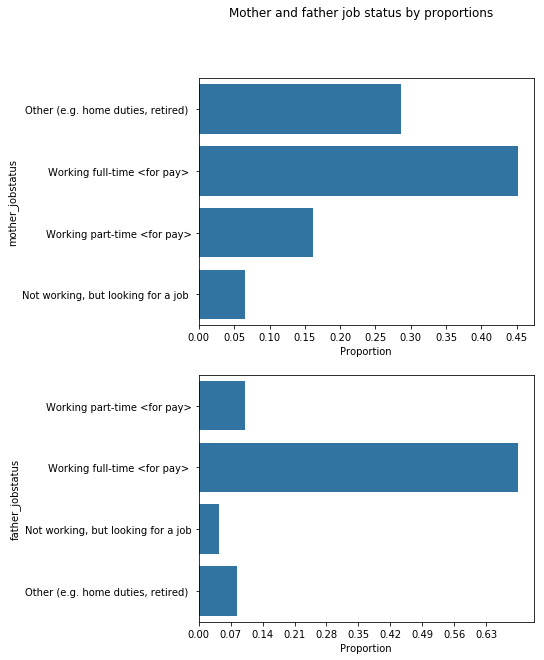

In [250]:
# get proportion taken by most common group for derivation
# of tick marks
n_points= df_student.shape[0]
max_count_mother = df_student['mother_jobstatus'].value_counts().max()
max_count_father = df_student['father_jobstatus'].value_counts().max()

max_prop_mother= max_count_mother/n_points
max_prop_father= max_count_father/n_points

#Print max_prop to get the scale stepsize

# generate tick mark locations and names
tick_props_mother = np.arange(0, max_prop_mother, 0.05)
tick_names_mother = ['{:0.2f}'.format(v) for v in tick_props_mother]

tick_props_father= np.arange(0, max_prop_father, 0.07)
tick_names_father= ['{:0.2f}'.format(v) for v in tick_props_father]

# create the plot
fig,ax= plt.subplots(nrows=2, figsize = [6, 10])

plt.suptitle("Mother and father job status by proportions")
base_color = sb.color_palette()[0]
sb.countplot(data = df_student, y= 'mother_jobstatus', color = base_color, ax=ax[0]);
ax[0].set_xticks(tick_props_mother * n_points)
ax[0].set_xticklabels(tick_names_mother)
ax[0].set_xlabel("Proportion")
#plt.xticks(tick_props_mother * n_points, tick_names_mother)

sb.countplot(data=df_student, y = 'father_jobstatus', color = base_color, ax=ax[1]);
#plt.xticks(tick_props_father * n_points , tick_names_father)
ax[1].set_xticks(tick_props_father * n_points)
ax[1].set_xticklabels(tick_names_father)
ax[1].set_xlabel("Proportion")

Proportion of Working moms is a only a little less than working dads. Also moms not working  are high in proportion than non working fathers. 
Retired moms are 25% and retired fathers are only 7% in this data set.


Next look at univariate distributions of Math teacher's attributes.

In [47]:
df_teacher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
country              485490 non-null object
student_id           485490 non-null object
teacher_showinter    315248 non-null object
teacher_helps        314368 non-null object
teacher_setgoal      314909 non-null object
encourage_think      314328 non-null object
check_understand     313875 non-null object
give_feedback        313782 non-null object
reflect_onprobs      314171 non-null object
help_learn_mist      312591 non-null object
ask_forexplains      311814 non-null object
dtypes: object(11)
memory usage: 40.7+ MB


In [48]:
columns=['teacher_helps', 'check_understand','ask_forexplains', 'teacher_setgoal', 'give_feedback']
for c in columns:
    print(c ,'\n',  df_teacher[c].value_counts() ,'\n')

teacher_helps 
 Every Lesson            153025
Most Lessons             89992
Some Lessons             54126
Never or Hardly Ever     17225
Name: teacher_helps, dtype: int64 

check_understand 
 Every Lesson            130413
Most Lessons            104426
Some Lessons             60052
Never or Hardly Ever     18984
Name: check_understand, dtype: int64 

ask_forexplains 
 Always or almost always    110875
Often                      107784
Sometimes                   69996
Never or rarely             23159
Name: ask_forexplains, dtype: int64 

teacher_setgoal 
 Most Lessons            116036
Every Lesson            114357
Some Lessons             64800
Never or Hardly Ever     19716
Name: teacher_setgoal, dtype: int64 

give_feedback 
 Some Lessons            108851
Never or Hardly Ever    106370
Most Lessons             63036
Every Lesson             35525
Name: give_feedback, dtype: int64 



Let us plot these variables to see the comparison by their counts.

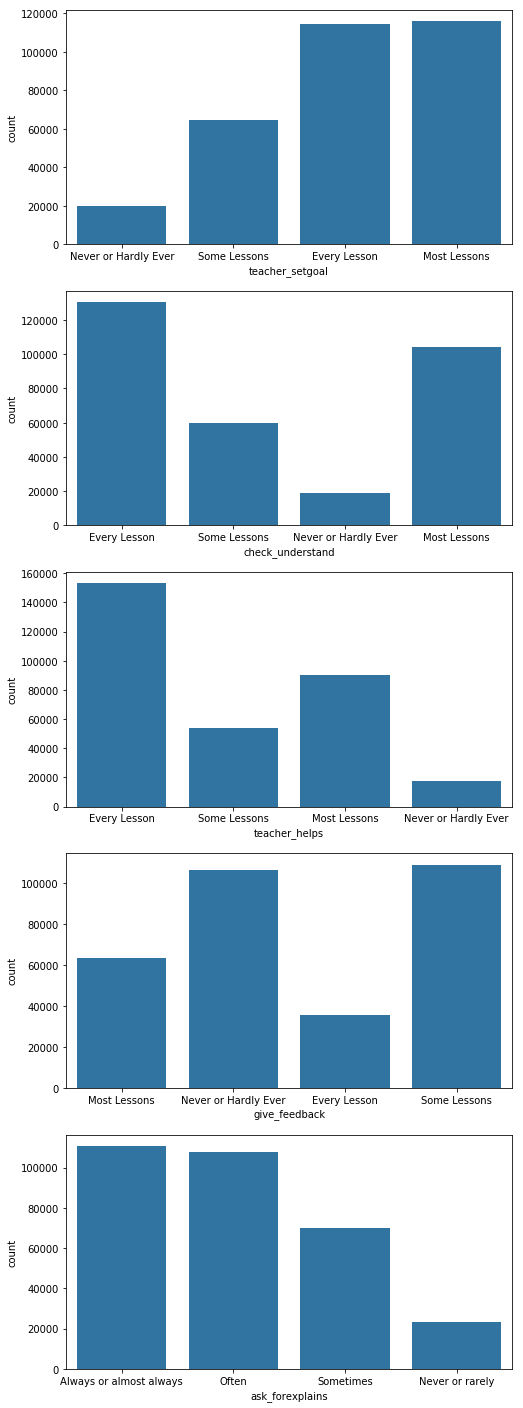

In [49]:
fig, ax = plt.subplots(nrows=5, figsize = [8,25])

sb.countplot(data=df_teacher, x='teacher_setgoal', color = base_color, ax=ax[0]);
sb.countplot(data=df_teacher, x='check_understand', color = base_color, ax= ax[1]);
sb.countplot(data=df_teacher, x='teacher_helps', color = base_color, ax= ax[2]);
sb.countplot(data=df_teacher, x='give_feedback', color = base_color, ax= ax[3]);
sb.countplot(data= df_teacher , x= 'ask_forexplains', color = base_color, ax= ax[4]);

Most data points are showing good teacher support but for the teacher feedback, plot shows a high number for no or less feedback from the teacher.It will be interesting to see what other features are associated with this trait.

Next look at two numeric variables number of math classes per week and duration of math periods.

In [50]:
math_score.head()

,country,student_id,math_score
0,Albania,00001,366.18634
1,Albania,00002,470.56396
2,Albania,00003,505.53824
3,Albania,00004,449.45476
4,Albania,00005,385.50398


In [51]:
#Merge with df_student on country and student id with math_score for further analyses
student_score= pd.merge(df_student, math_score, on =['country', 'student_id'])

In [52]:
#Shape seen as expected
student_score.shape

(485490, 36)

In [53]:
student_score.head()

,country,oecd,student_id,gender,truancy,mother_jobstatus,father_jobstatus,possess_internet,matint_enjoys,matint_lookforward,...,min_classperiod,attschool_waste,school_doeslittle,attschool_prepcoll,perseve_giveup,perseve_exceedexp,perseve_interest,open_toprobsolve,open_solvecomplex,math_score
0,Albania,Non-OECD,00001,Female,None,"Other (e.g. home duties, retired)",Working part-time <for pay>,No,Agree,Agree,...,NaN,Strongly agree,Agree,Strongly agree,Very much like me,Very much like me,Very much like me,Mostly like me,Somewhat like me,366.18634
1,Albania,Non-OECD,00002,Female,None,Working full-time <for pay>,Working full-time <for pay>,Yes,Disagree,Disagree,...,45,NaN,NaN,NaN,Not at all like me,Very much like me,Mostly like me,Not much like me,Not much like me,470.56396
2,Albania,Non-OECD,00003,Female,None,Working full-time <for pay>,Working full-time <for pay>,Yes,Agree,Agree,...,NaN,NaN,NaN,NaN,Not much like me,Somewhat like me,Very much like me,Very much like me,Very much like me,505.53824
3,Albania,Non-OECD,00004,Female,None,Working full-time <for pay>,Working full-time <for pay>,Yes,NaN,NaN,...,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.45476
4,Albania,Non-OECD,00005,Female,None,Working part-time <for pay>,Working part-time <for pay>,Yes,Disagree,Disagree,...,NaN,Strongly disagree,Disagree,Strongly agree,NaN,Very much like me,Very much like me,Mostly like me,Mostly like me,385.50398


In [54]:
student_score['numclass_perweek']=pd.to_numeric(student_score['numclass_perweek'], errors ='coerce')

In [55]:
student_score['min_classperiod']=pd.to_numeric(student_score['min_classperiod'], errors= 'coerce')

I decided to not drop the rows with NaN values because there are thousands of such rows, so we might lose much other data.
More over I compared the univariate distributions of these variables with and without removing NaN values. There was not much of a distinguishing difference between the two so I decided to keep these rows by replacing the NaN values with the median of these
variables as the distributions are a bit skewed for the both.

In [56]:
#Fill in the NaN values with median of the number of classes 
student_score['math_perweek']= student_score['numclass_perweek'].fillna(4).astype('int64')


In [57]:
#student_score.rename(columns={'test':'math_perweek'}, inplace = True)

In [58]:
#Replace the Nan values in the class period with its median
student_score['duration']= student_score['min_classperiod'].fillna(50).astype('int64')

In [59]:
student_score[['math_score','duration','math_perweek']].describe()

,math_score,duration,math_perweek
count,485490.000000,485490.000000,485490.000000
mean,469.651234,51.790581,4.215230
std,100.786610,13.413256,1.306625
min,54.767080,15.000000,0.000000
25%,396.019620,45.000000,4.000000
50%,465.734520,50.000000,4.000000
75%,540.123060,50.000000,5.000000
max,903.107960,180.000000,40.000000


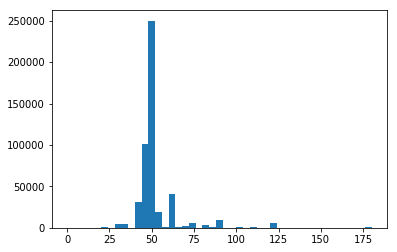

In [60]:
# log transformation not applied here
bins= 4
bin_edges=np.arange(0, student_score['duration'].max()+ 2, bins)
plt.hist(student_score['duration'],bins=bin_edges );
#plt.xlim(0, 25)

Below I have applied the log transformation to the variable 'duration' of math period as it has a few extreme values.

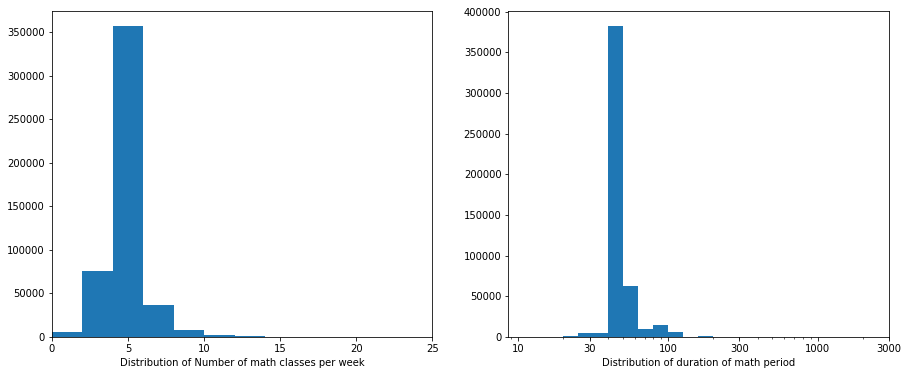

In [71]:
plt.figure(figsize=[15, 6])

#Plot the distribution of math classes per week
plt.subplot(1, 2, 1)
binsize= 2
bin_edges= np.arange(0, student_score['math_perweek'].max() +2 , binsize)
plt.hist(student_score['math_perweek'], bins = bin_edges);
plt.xlabel('Distribution of Number of math classes per week');
plt.xlim(0, 25);

#Plot the distribution of duration of math periods

plt.subplot(1,2,2)
#log_data=np.log10(student_copy['min_classperiod'])
#bins= 10
log_bin_edges2= 10 ** np.arange(1.0, np.log10(student_score['duration'].max()) +0.1, 0.1)
plt.xscale('log')
plt.hist(student_score['duration'], bins = log_bin_edges2);
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xlabel("Distribution of duration of math period");
plt.xticks(tick_locs, tick_locs);

Per week number of math classes in this dataset fall mostly between 4  and 5 periods.
Although there are some values that are higher than 10 as well. The max value is 40 which seems to be off
and needs further investigation. 
The duration of math class periods is between 45 to 55 minutes for the most. The curve is multimodal in places indicating a diverse range of values for the duration of math period in minutes.

Check for the ouliers in the variables duration of math class and classes per week.

In [64]:
len(student_score[student_score['math_perweek']==40])

13

There are 13 such samples where the number of math classes per week is equal to 40.

In [217]:
student_score[student_score['duration'] > 150].head()
#student_score[student_score['duration'] > 150]

,country,oecd,student_id,gender,truancy,mother_jobstatus,father_jobstatus,possess_internet,matint_enjoys,matint_lookforward,...,school_doeslittle,attschool_prepcoll,perseve_giveup,perseve_exceedexp,perseve_interest,open_toprobsolve,open_solvecomplex,math_score,math_perweek,duration
16243,Argentina,Non-OECD,00001,Female,None,"Not working, but looking for a job",Working full-time <for pay>,Yes,Strongly agree,Strongly agree,...,NaN,NaN,Not at all like me,Very much like me,Mostly like me,Very much like me,Very much like me,435.27808,3,180
16250,Argentina,Non-OECD,00008,Male,None,"Other (e.g. home duties, retired)",Working part-time <for pay>,Yes,NaN,NaN,...,Disagree,Agree,NaN,NaN,NaN,NaN,NaN,442.60010,3,180
16251,Argentina,Non-OECD,00009,Male,None,Working full-time <for pay>,Working full-time <for pay>,Yes,NaN,NaN,...,Strongly disagree,Strongly agree,NaN,NaN,NaN,NaN,NaN,487.31110,2,180
16252,Argentina,Non-OECD,00010,Male,One or two times,Working part-time <for pay>,"Other (e.g. home duties, retired)",Yes,Disagree,Strongly disagree,...,NaN,NaN,Not much like me,Somewhat like me,Very much like me,Mostly like me,Somewhat like me,444.54742,3,180
16253,Argentina,Non-OECD,00011,Male,None,"Other (e.g. home duties, retired)",Working full-time <for pay>,Yes,NaN,NaN,...,Strongly agree,Agree,NaN,NaN,NaN,NaN,NaN,542.14832,3,180


There 1079 such rows for Argentina and USA where the duration is greater than 150 min. I do not think these are incorrect values since there are multiple such rows and possibly 
true and not human error either. So I will not discard them.

# Discuss the distribution(s) of your variable(s) of interest.
Most of the variables in the pisa data are of categorical type which describe the student and teacher behaviors. Of these,
I will be focussing on a few of each to see their effect on the achievement scores in math. 

## Transformations done
The major calculation I needed to do is that of calculating the math score from the five plausible values given.
To do this, I calculated the weighted average using the small function that I wrote. I convert the required features like number of math classes per week, duration of mathc class period to the correct numeric types. Secondly, I used log transformations
for the duration of class variable since it had a skewed data to view the distribution.

# Bivariate distributions

Let us start with looking at the variables math classes per week and the math score.
Below I am using a helper function to calculate the logarithmic transformations.

In [76]:
#Function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [67]:
#Find the correlation between two numeric variables
np.corrcoef(student_score['math_perweek'], student_score['math_score'])

array([[1.        , 0.12843692],
       [0.12843692, 1.        ]])

There is a positive but weak correlation between the math classes per week and the math score.
 Let us visualize this below.

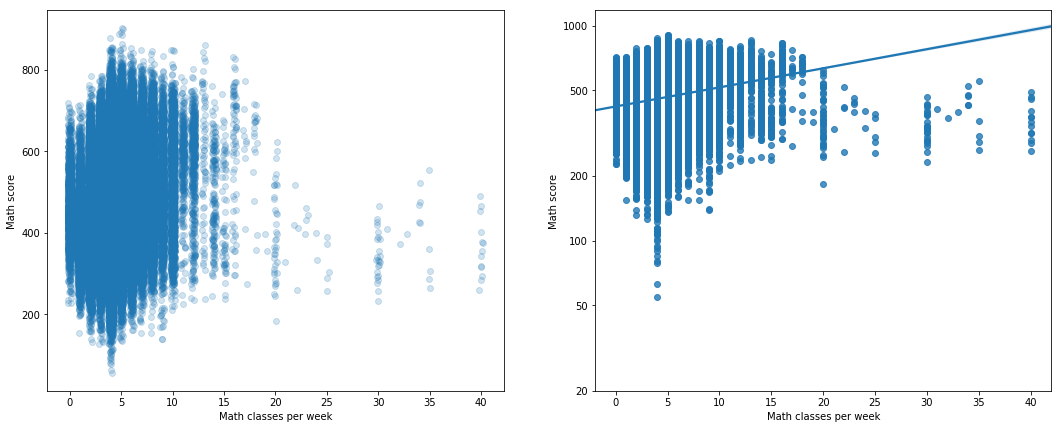

In [296]:
plt.figure(figsize=[18 , 7])

#Applying jitter as there is a lot of overplotting
plt.subplot(1,2,1)
sb.regplot(data = student_score, x = 'math_perweek', y = 'math_score', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});

plt.xlabel("Math classes per week");
plt.ylabel("Math score");

plt.subplot(1,2,2)
#in pattern of 1,3,10 OR 10,20,50,100
sb.regplot(student_score['math_perweek'], student_score['math_score'].apply(log_trans));
tick_locs = [20, 50, 100, 200, 500, 1000]
#x_ticks=[0, 3 , 10, 30, 300]
plt.yticks(log_trans(tick_locs), tick_locs);
plt.xlabel("Math classes per week");
plt.ylabel("Math score");


Above we see that only by adding some transparency we are able to see the overplotting. We are able to see the pattern 
more clearly after taking log transformations of the data.

The math score is highly variable for the number of math classes between the values 4 and 5 per week; high being between 800 to
900 and as low as 54. The highest score remains above 500 for around 20 math classes per week but the score does not necessarily increase with the classes per week. Infact, the highest score for number of classes above 15 tend to decrease thereafter. This might be associated with yet another feature.

In [69]:
#Lets look at the relation ship between duration of math class period and math score
np.corrcoef(student_score['duration'], student_score['math_score'])

array([[ 1.        , -0.03640321],
       [-0.03640321,  1.        ]])

The negative correlation of -0.03 suggests that the math score does not increase as the duration of math periods increases.

Let us look at it visually as below.

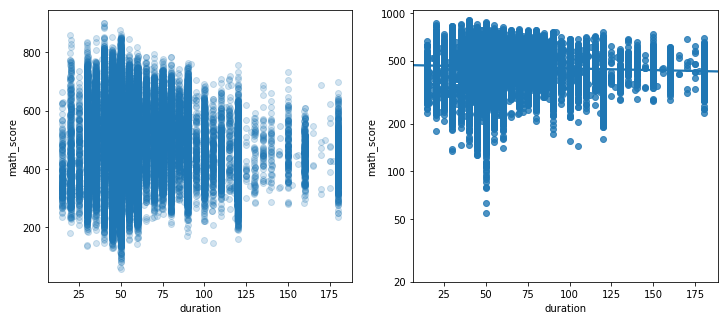

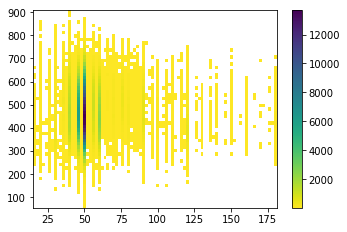

In [248]:
plt.figure(figsize=[12 , 5])

plt.subplot(1,2,1)
sb.regplot(data = student_score, x = 'duration', y = 'math_score', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});

plt.subplot(1,2,2)
#Applying transformations
sb.regplot(student_score['duration'], student_score['math_score'].apply(log_trans));
tick_locs = [20, 50, 100, 200, 500, 1000]
#x_ticks=[0, 3 , 10, 30, 300]
plt.yticks(log_trans(tick_locs), tick_locs);

#Try the heat map 
plt.figure(figsize=[12, 8])

plt.subplot(2,2,1)
bins_x= np.arange(15, 180+ 2, 2)
bins_y = np.arange(54, 903 +15, 15)
plt.hist2d(data= student_score, x='duration', y='math_score', bins=[bins_x, bins_y], cmap= 'viridis_r',cmin = 0.5);
plt.colorbar()

The heat map shows dense data in the dark colored region at durations between 40 to 50  with score ranging from 300 to 600. And then going down. This clearly shows a negative trend between these two variables.

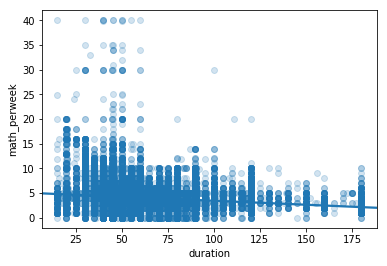

In [72]:
#LOOK AT THE relationship between duration and number of classes per week

sb.regplot(data= student_score, x= 'duration', y='math_perweek', fit_reg= True, x_jitter= 0.04, y_jitter =0.03,
          scatter_kws={'alpha':1/5});

Bulk of the data points show duration of math classes between 45 to 75 min although there are skewed values and most 
math classes are between 4 to 6 per week and decrease  in number as the duration increases.

Next we willlook at the math score and some categorical variables. We shall make use of violin plots here.


In [73]:
categoric_vars=['matint_enjoys','matint_lookforward','motiv_forfuture','payattn_inclass','attschool_waste','attschool_prepcoll',
        'matanxious_worry','school_doeslittle']


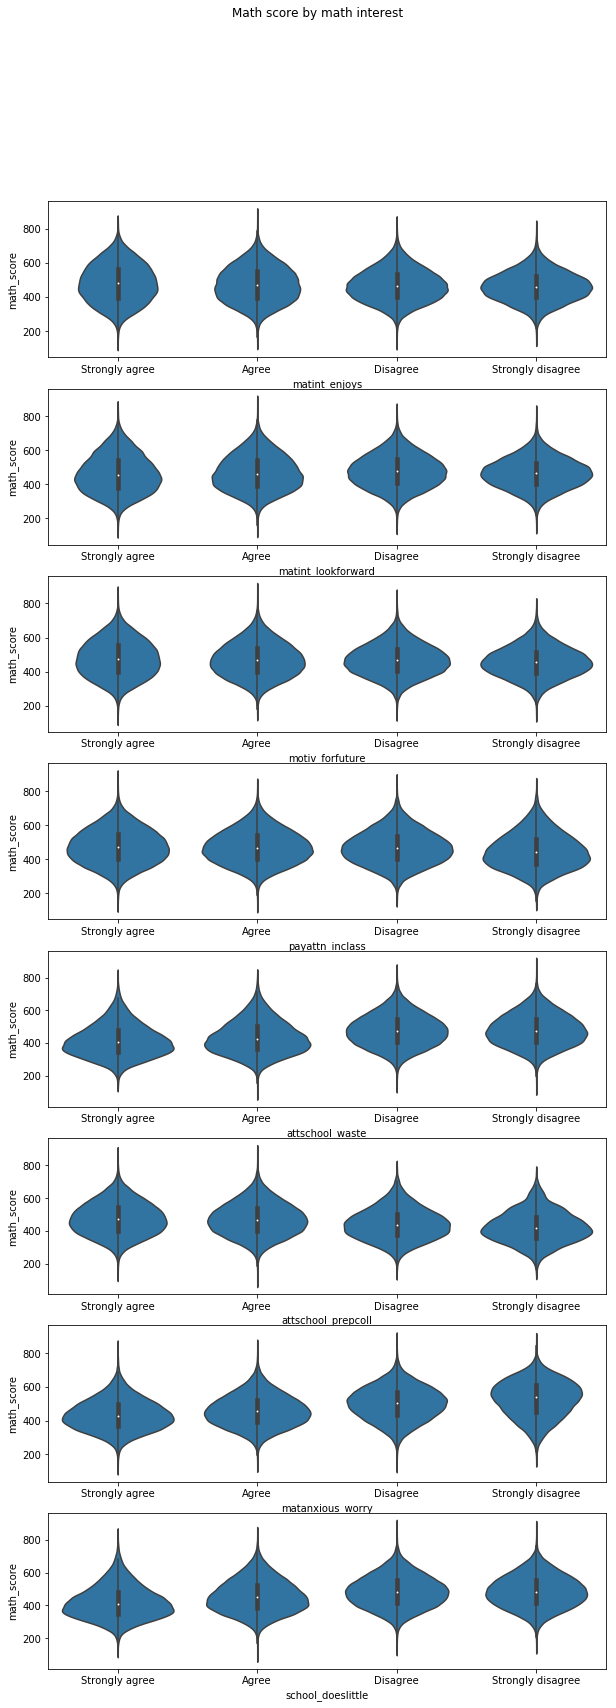

In [238]:
fig , ax= plt.subplots(ncols= 1, nrows = 8, figsize=[10,27]);

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data= student_score, x= var, y = 'math_score', ax= ax[i], color =base_color);
fig.suptitle('Math score by math interest')    ;

Looks like people who enjoy math, are motivated for future and pay attention in math class are more in number than their 
counterparts but their scores don't vary by much; it is not clear in this plot. Also people who think school is a waste of 
time are a little higher in number, so are the ones with math anxiety and don't agree that school prepares for college.
As for their math scores, it seems that less math anxious students may score a bit higher than others and same goes for 
students who agree that school does a lot to prepare for future. But we need a different plot to understand these relationships
better.

Below, I tried faceting the data by the student's attitudes.

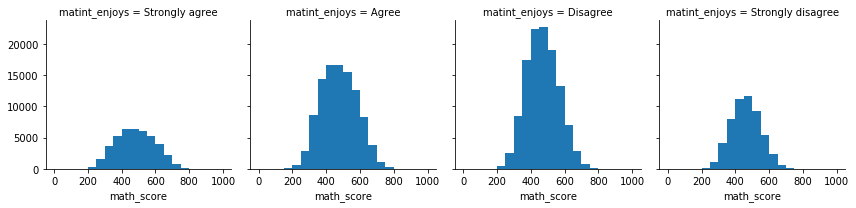

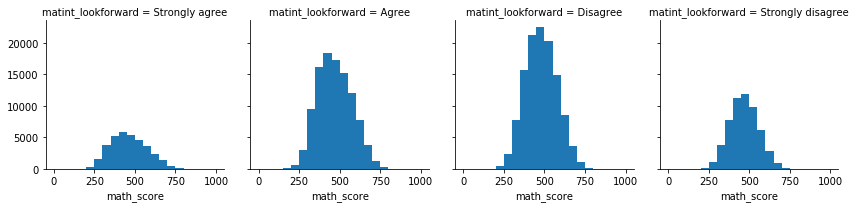

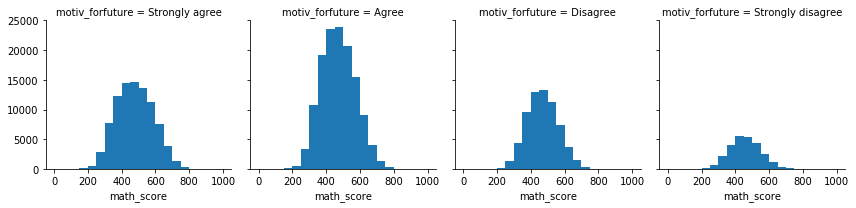

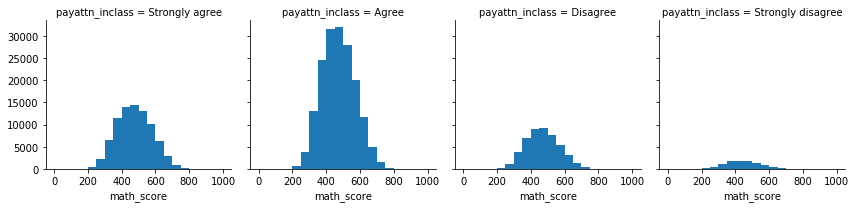

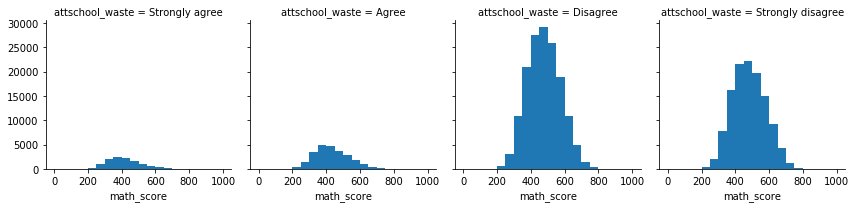

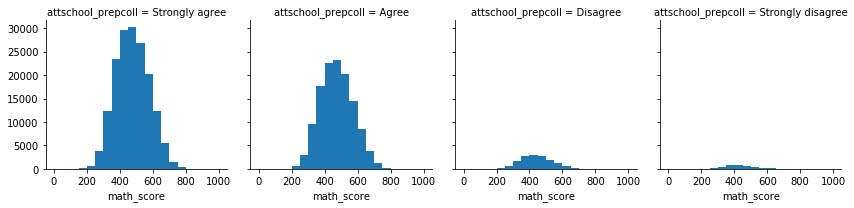

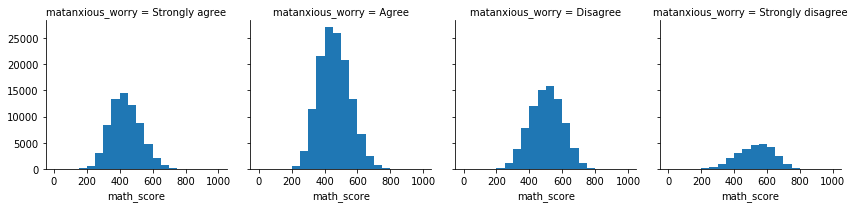

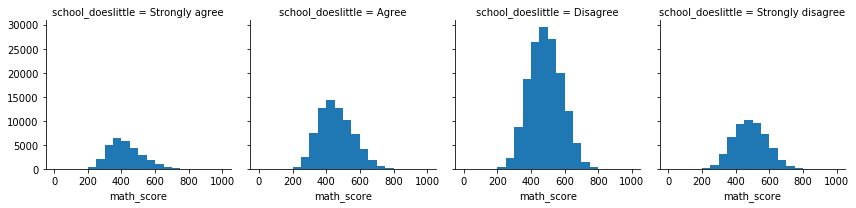

In [75]:
#fig , ax= plt.subplots(ncols= 1, nrows = 8, figsize=[10,26])

for i in range(len(categoric_vars)):
    var5= categoric_vars[i]
    binsize= 50
    bins= np.arange(0, math_score['math_score'].max() + 100, binsize)
    g= sb.FacetGrid(data= student_score, col=var5 );
    g.map(plt.hist, 'math_score', bins= bins)

Here, it is more clear that students who disagree on enjoying math are actually higher in number and the bulk of data have scores between 300 and 600 for this category. For those who look forward to math sessions are very low in count than those who do but surprsingly the scores range the same for both from 250 to 750. People who are math anxious are bigger in number but still are scoring between 400 and 600. Students paying attention in class and are motivated are also high in number as we also saw in the earlier violin plot. So students with positive attitudes generally appear to be more in number.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

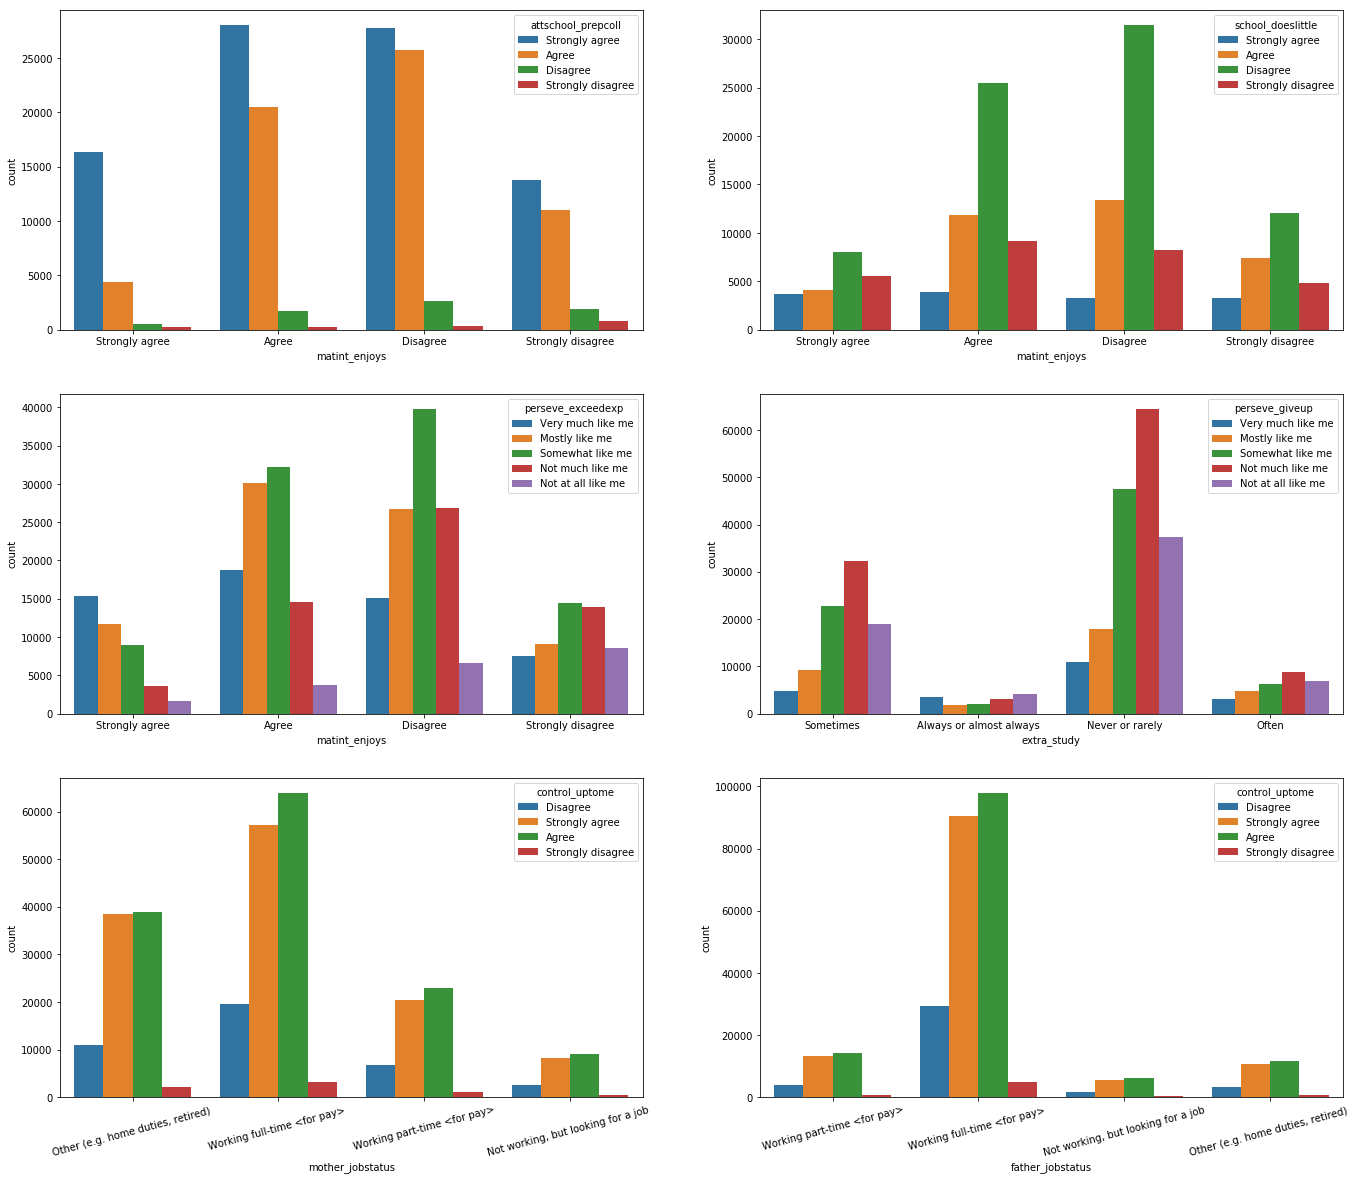

In [243]:
#LOOK AT OTHER FEATURES : matint_enjoys vs. attschool_prepcoll
plt.figure(figsize=[23,20]);

plt.subplot(3,2,1)
sb.countplot(data = student_score, x = 'matint_enjoys', hue = 'attschool_prepcoll');

plt.subplot(3,2,2)
sb.countplot(data = student_score, x = 'matint_enjoys', hue = 'school_doeslittle');

plt.subplot(3,2,3)

sb.countplot(data = student_score, x = 'matint_enjoys', hue = 'perseve_exceedexp');

plt.subplot(3,2,4)
sb.countplot(data = student_score, x = 'extra_study', hue = 'perseve_giveup');

plt.subplot(3, 2, 5)
sb.countplot(data=student_score, x='mother_jobstatus', hue= 'control_uptome')
plt.xticks(rotation= 15)

plt.subplot(3,2, 6)
sb.countplot(data= student_score, x= 'father_jobstatus', hue='control_uptome')
plt.xticks(rotation= 15)

Students who highly enjoy math are less in count, seem to have good perseverance than those who don't but both groups disagree that school does a little for for them and agree more that school prepares them for college.Students who study extra time are very less in count and don't seem to give up. Most students seem to have a good perceived sense of control or feel responsible  in their attitude towards math learning regardless of their parent's jobstatus but  interestingly,the ratio of having sense of control to not having is less for parents who are working part time or not working currently. I had expected otherwise.

Plot the remaining student's behavior attributes with math score.

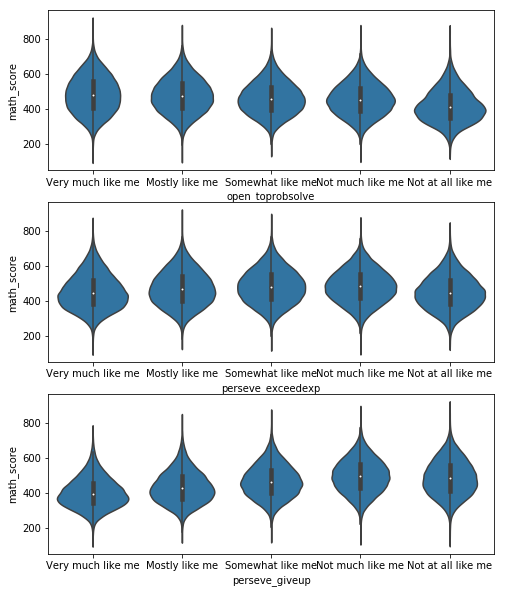

In [80]:
categoric_2= ['open_toprobsolve','perseve_exceedexp','perseve_giveup']

fig , ax= plt.subplots(ncols= 1, nrows = 3, figsize=[8,10])
for i in range(len(categoric_2)):
    var2= categoric_2[i]
    sb.violinplot(data= student_score, x= var2, y = 'math_score', ax= ax[i], color =base_color);

It appears from the above plots that students who don't and are open to problem solving give up are scoring better than
the ones who do. But let us again look at the subset of data by the categorical levels instead. 

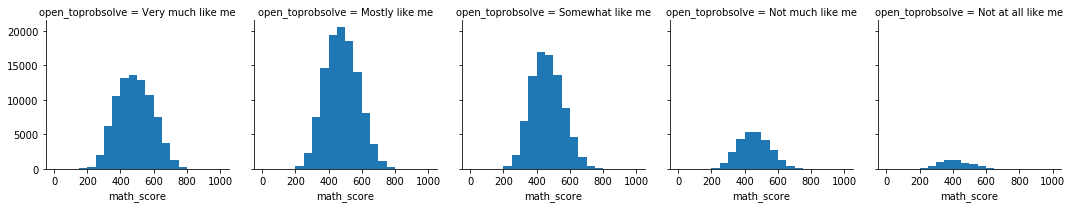

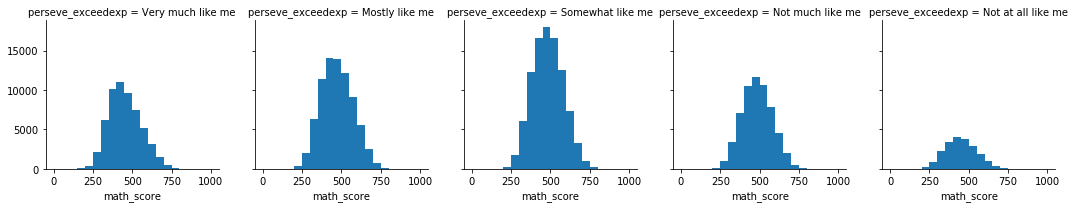

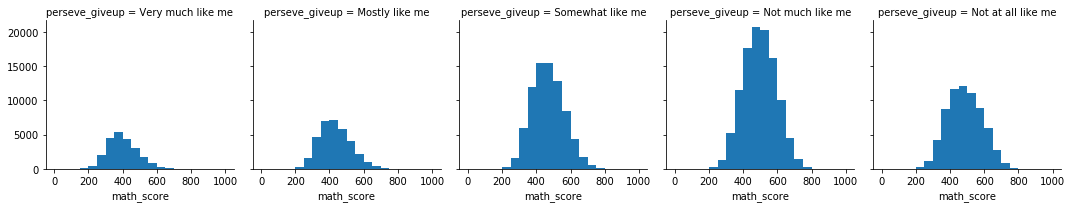

In [81]:
#Try faceting
categoric_2= ['open_toprobsolve','perseve_exceedexp','perseve_giveup']

#fig , ax= plt.subplots( figsize=[20,20])
for i in range(len(categoric_2)):
    var4= categoric_2[i]
    binsize= 50
    bins= np.arange(0, math_score['math_score'].max() + 100, binsize)
    g= sb.FacetGrid(data= student_score, col=var4 );
    g.map(plt.hist, 'math_score', bins= bins)


So, above we are looking at the perseverance of students and their math score distribution. Students who are open to problem 
solving and not giving up or exceed expectations are higher  peak at 500 for the score values. Students not open to problem solving  or tend to give up  score range varies from 200 to 700. 

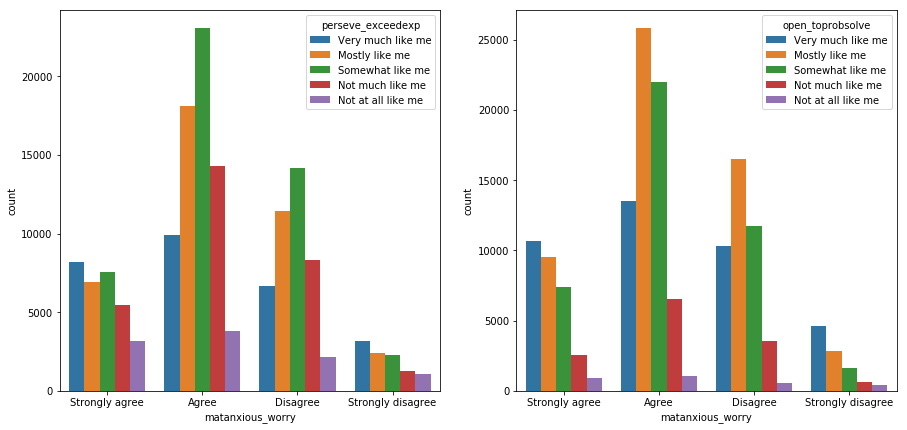

In [82]:
#LOOK AT OTHER FEATURES other than main: math anxious and perseve_giveup
plt.figure(figsize=[15, 7])
plt.subplot(1,2,1)
sb.countplot(data = student_score, x = 'matanxious_worry', hue = 'perseve_exceedexp');

plt.subplot(1,2,2)
#plt.figure(figsize=[6,6])
sb.countplot(data = student_score, x = 'matanxious_worry', hue = 'open_toprobsolve');


People who are highly math anxious are more in number and also seem to have strong preseverance and exceed expectations as equal as their counterparts as this ratio is very close a seen. Highly math anxious students are also open to problem solving than those not anxious.

In [83]:
teacher_score =pd.merge(df_teacher, math_score, on =['country', 'student_id'])

In [84]:
teacher_score.shape

(485490, 12)

In [85]:
teacher_score.columns

Index(['country', 'student_id', 'teacher_showinter', 'teacher_helps',
       'teacher_setgoal', 'encourage_think', 'check_understand',
       'give_feedback', 'reflect_onprobs', 'help_learn_mist',
       'ask_forexplains', 'math_score'],
      dtype='object')

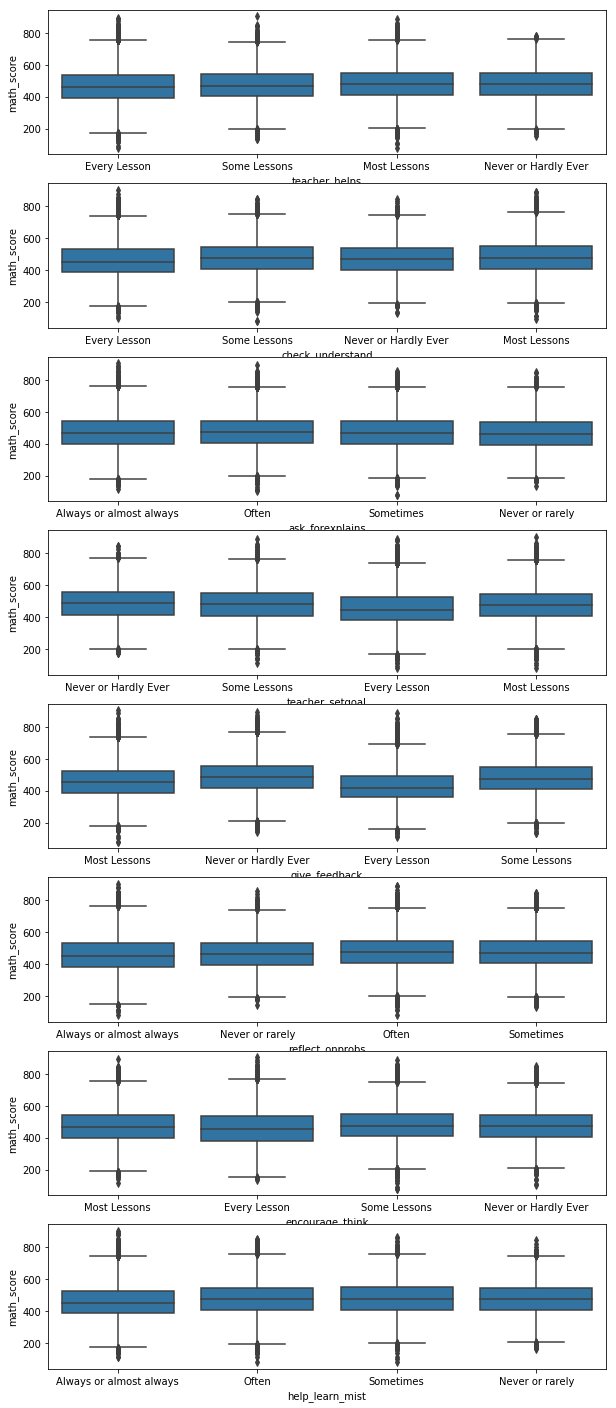

In [86]:
columns=['teacher_helps', 'check_understand','ask_forexplains', 'teacher_setgoal', 'give_feedback', 'reflect_onprobs',
          'encourage_think', 'help_learn_mist']

fig , ax = plt.subplots(ncols= 1, nrows = 8, figsize=[10,25])

for i in range(len(columns)):
    var3= columns[i]
    sb.boxplot(data= teacher_score, x= var3, y = 'math_score', ax= ax[i], color =base_color);

From the box plots above there is not much difference seen in the scores based on teacher's support. Only a few features like where the teacher relflected on problems, encouraged to think or helped learned from mistakes had a few outliers but the bulk of data points did not show any difference in the math score than the others.

Other variables still left to explore are  the gender  and the country to relate with thhe math score.

Text(0,0.5,'Avg. math score by the gender')

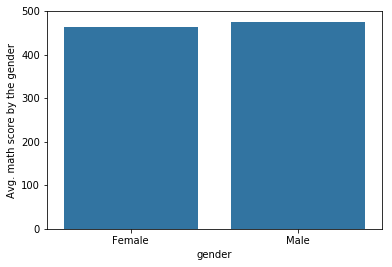

In [87]:
sb.barplot(data = student_score, x= 'gender', y='math_score', color =base_color);
plt.ylabel('Avg. math score by the gender')

Look at the mean math score by grouping the data by the unique country and student id combination.

In [280]:
test_country= student_score.groupby(['country', 'student_id'])['math_score'].mean().reset_index(name='meanscore', level =0)

In [287]:
tc_1= test_country[test_country['meanscore'] >= 700]

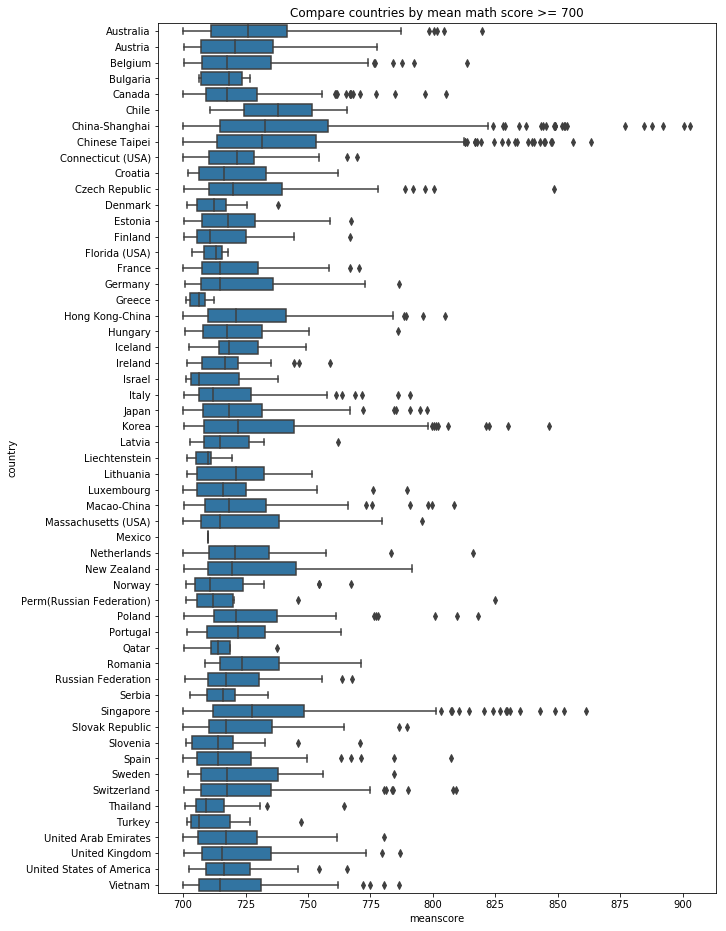

In [289]:
plt.figure(figsize=[10,16]);
plt.title("Compare countries by mean math score >= 700")
sb.boxplot(data= tc_1, x= 'meanscore', y ='country', color = base_color);

Of the above high scoring countries, the highest maximum is seen for Singapore, China-Shanghai, Korea, Chinese-Taipei which is 
at or above 775. Most outliers are seen for Singapore and China-Shanghai.

In [290]:
tc_2= test_country[test_country['meanscore'] <=400]

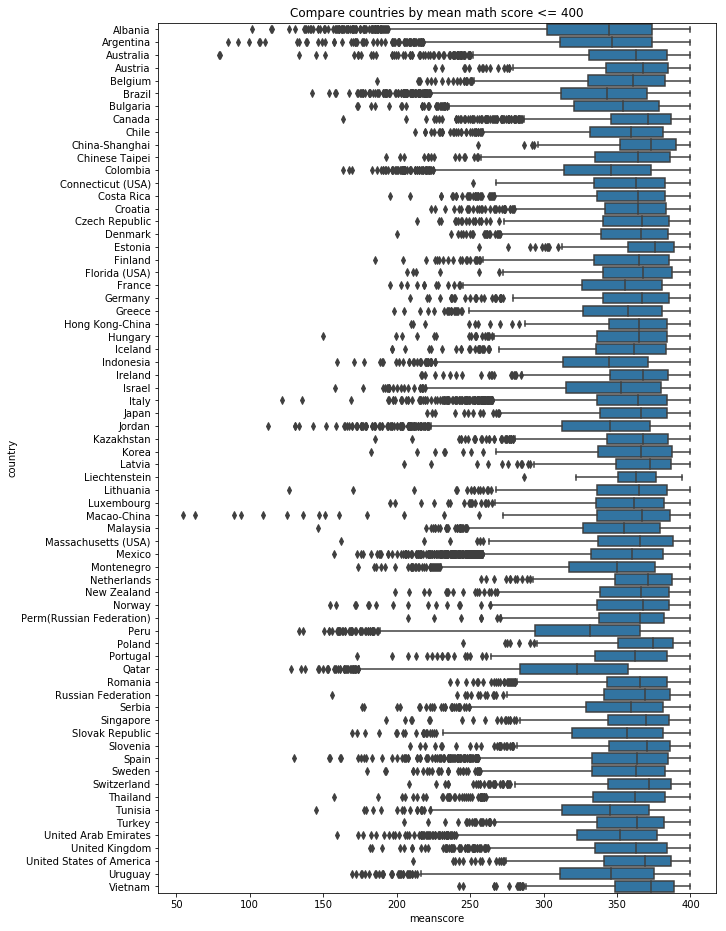

In [291]:
plt.figure(figsize=[10,16]);
plt.title("Compare countries by mean math score <= 400")
sb.boxplot(data= tc_2, x= 'meanscore', y ='country', color = base_color);

Of the low scoring countries, the lowest scores found below 250 are in Qatar, Peru,Indonesia, Israel, Uruguay. There are numerous outliers
seen here too.

# Discussion about the bivariate relationships

The math score increased as the number of math classes increased upto 5 to 6 classes per week. Increase in duration of classes 
did not necessarily have increased math score. Students with positive attitudes like paying attention in class, agreeing that the school prepares for future are more in number than the students who enjoy math and look forward to the classes. 
Math enthusiasts and non enthusiasts almost equally think school is important and prepares for college.
Similarly, students who are math anxious and do extra study tend to perseve more and not give up. The scores for students with negative attitudes ranged from 200 to 700 and the peak score for positive ones was at 500. 
But over all for bulk of the data the math scores range from 300 to 600. Students whose parents are both working full time 
had a better perceived sense of control over their studies than the ones who had part time or non working parents which I did not expect.
Only a few features regarding teachers attributes like  teacher relflection on problems, encouraged to think or helped learned from mistakes had a few high score outliers for the math scores. There was not much difference in the scores with teacher's attributes other wise.
Countries with higher mean math score were China-Shanghai,Korea, Singapore,Chinese Taipei and most minimum low scoring were
Qatar, Peru, Indonesia, Israel and Uruguay.


# Explore multivariate relationships.
Here, I want to explore between the attributes where students are math anxious and to see if they do any better with teacher support. Further, I have explored some more features like possessions by students in terms of having internet access with their performance. Also further look at the math performance for different countries based on the student and teacher attributes.
But first look at math class per week and math score by gender.

In [91]:
# Use only a sample of this large data to understand the trend clearly

np.random.seed(1977)
asample= np.random.choice(student_score.shape[0], 500, replace=False)
student_score_subset= student_score.loc[asample]

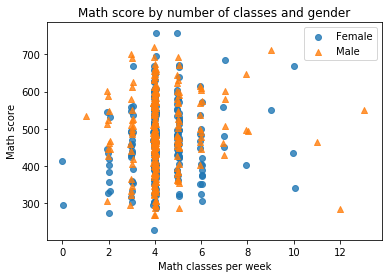

In [92]:
#Use a for loop to set the marker by the gender
gender_marker= [['Female','o'], 
                ['Male' , '^']]
for gender, marker in gender_marker:
    plot_data = student_score_subset.loc[student_score_subset['gender']== gender]    
    sb.regplot(data = plot_data, x= 'math_perweek', y = 'math_score', x_jitter=0.06, fit_reg= False, marker = marker);
plt.xlabel('Math classes per week')
plt.ylabel('Math score') 
   
plt.legend(['Female', 'Male'])
plt.title('Math score by number of classes and gender');

We see above that for 4 classes per week, both male and females have math scores ranging from 300 to 600 although the highest 
scorers are female. For 5 classes per week there is a mix of male and female students scoring from 300 to a little above 700
but here female students show the highest score; thereafter both female and male numbers go down for number of classes more than 6.

Let us look at the duration of class, score by gender.

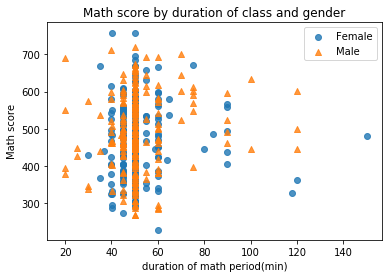

In [93]:
for gender, marker in gender_marker:
    plot_data = student_score_subset.loc[student_score_subset['gender']== gender]    
    sb.regplot(data = plot_data, x= 'duration', y = 'math_score', x_jitter=0.04, fit_reg= False, marker = marker);
plt.xlabel('duration of math period(min)')
plt.ylabel('Math score') 
   
plt.legend(['Female', 'Male'])
plt.title('Math score by duration of class and gender');

  Here, most of the data is where the duration of classes is between 45 to 50 min with male and female students scoring 
  between 300 to 700 with a few more data points showing high scores for female students. There is also an outlier possibly
  seen for the duration greater than 140 with a female scoring 500. 

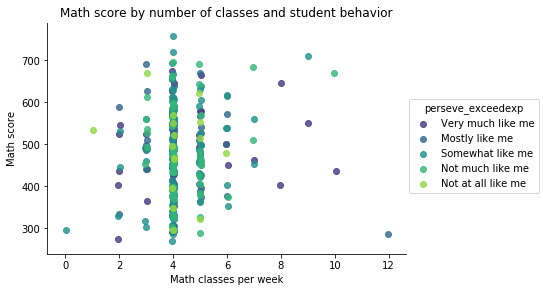

In [94]:
#Two numeric, one qualitative--- math score and num classes per week by perseverance

g= sb.FacetGrid(data= student_score_subset, hue='perseve_exceedexp', size = 4, aspect =1.5, palette='viridis')
g.map(sb.regplot, 'math_perweek', 'math_score', x_jitter= 0.04, fit_reg =False);
g.add_legend()
plt.xlabel('Math classes per week');
plt.ylabel('Math score');
plt.title('Math score by number of classes and student behavior');

With more than 5 classes per week, there are a few number of students who exceed expectations with high scores.

Explore relationship between teacher attribute, student attribute and math class stats.

Now I need to combine the teacher data frame and student to make one big dataframe to explore teacher, student and math 
achievements together.

In [95]:
#Merge teacher and student data
teacher_student= pd.merge(teacher_score, student_score, on=['country', 'student_id'])

In [219]:
np.random.seed(1978)
bsample= np.random.choice(teacher_student.shape[0], 1000, replace = False)
teacher_student_subset= teacher_student.loc[bsample]

In [97]:
teacher_student_subset['teacher_helps']= teacher_student_subset['teacher_helps'].astype('category')

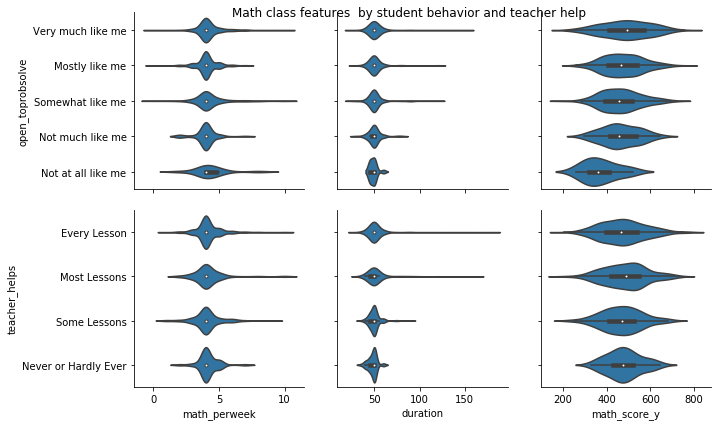

In [229]:

g = sb.PairGrid(data = teacher_student_subset, x_vars = ['math_perweek', 'duration', 'math_score_y'],
                y_vars = ['open_toprobsolve','teacher_helps'], size = 3)
g.map(sb.violinplot);
plt.suptitle('Math class features  by student behavior and teacher help');



The data is dense where the students are open to problem solving and receive scores ranging from 400 to 600 with number of 
math classes being between 4 to 5  the duration being 50 minutes. There are few data points where students are not open 
to problem solving and we see scores for them at or below 400. Also when the teacher never helps we see less dense data there but mostly the score there is around 500. When teacher helps for most lessons, bulk data are showing score at or above 500.

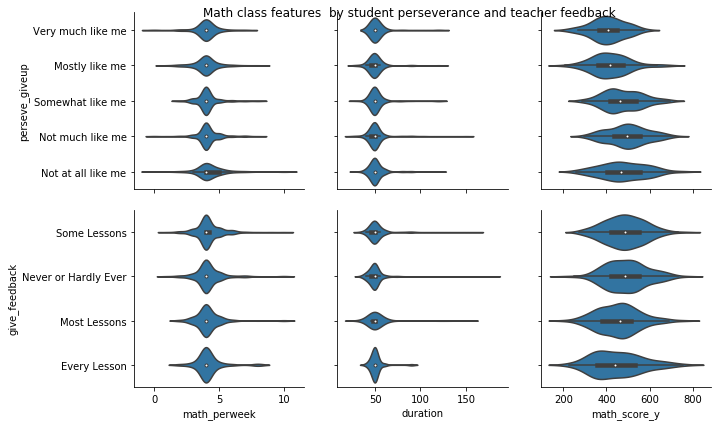

In [231]:
#Looking at more teacher and student attitudes
#plt.figure(figsize=[15, 15]);
g = sb.PairGrid(data = teacher_student_subset, x_vars = ['math_perweek', 'duration', 'math_score_y'],
                y_vars = ['perseve_giveup','give_feedback'], size = 3)
g.map(sb.violinplot);
plt.suptitle('Math class features  by student perseverance and teacher feedback');



Above we see that students who have strong perseverance have a little variable scores though mostly score better than those who give up. When teacher gives feedback for most lessons, the plot is seen more pointy towards high scores and otherwise it is 
variable and the median value does not vary much.

In [99]:
#Group the data by country and teacher plus student attributes and then find the mean math score

t_student_1= teacher_student_subset.groupby(['country', 'student_id','help_learn_mist',
                                             'open_toprobsolve'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


In [ ]:
#PLOT the teacher, student attributes and the math score


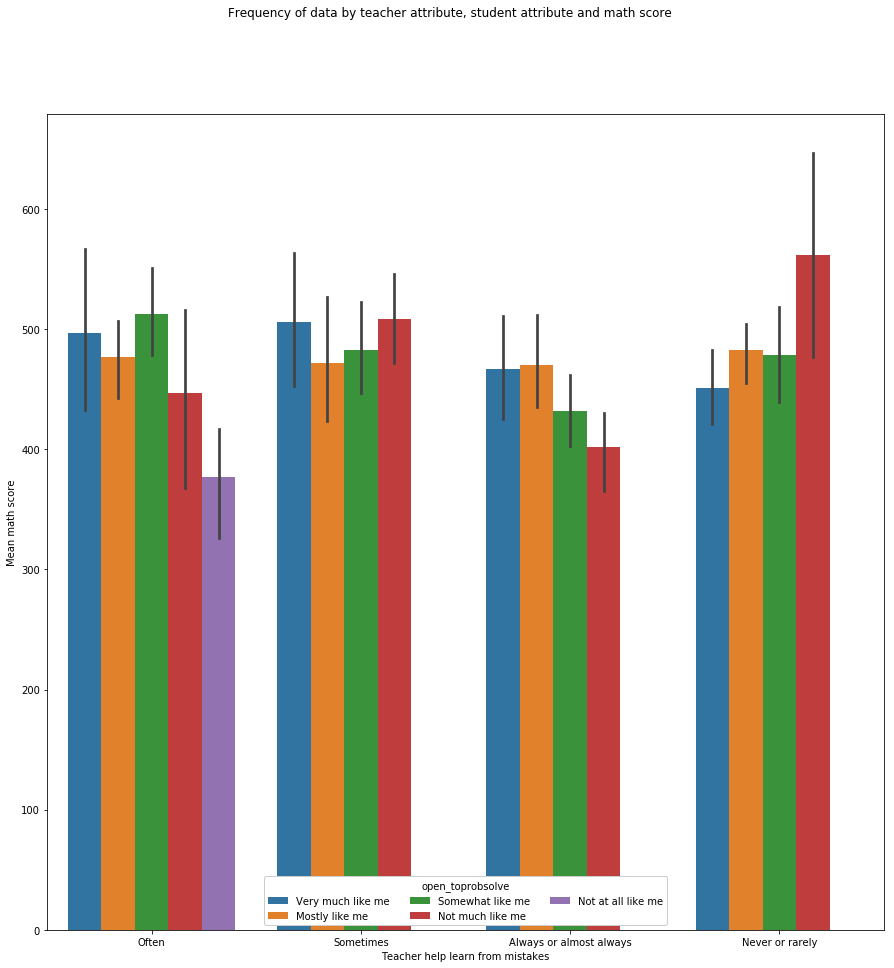

In [100]:
plt.figure(figsize=[15,15])
ax = sb.barplot(data = t_student_1, x = 'help_learn_mist', y = 'm_score', hue = 'open_toprobsolve')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'open_toprobsolve')
plt.xlabel('Teacher help learn from mistakes');
plt.ylabel('Mean math score');
plt.suptitle('Frequency of data by teacher attribute, student attribute and math score ');

Above, the general trend appears to be that when teacher helps the students learn from their mistakes for most or every lesson and the student is open to problem solving they score better grades and there are more such datapoints. Although there are data where the teacher hardly helps and students still got good grades but are not open to prblem solving. These students must be smarter.

In [101]:
t_student_4= teacher_student_subset.groupby(['country', 'student_id','matanxious_worry',
                                             'teacher_helps'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


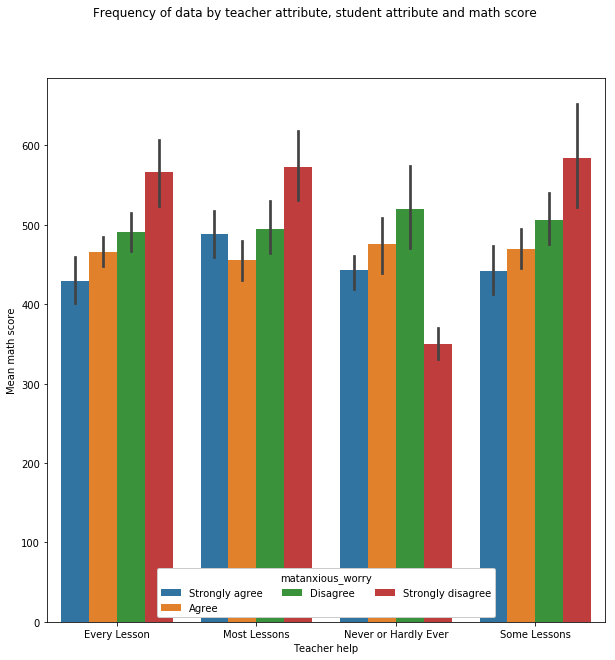

In [102]:
plt.figure(figsize=[10,10])
ax = sb.barplot(data = t_student_4, x = 'teacher_helps', y = 'm_score', hue = 'matanxious_worry')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'matanxious_worry')
plt.xlabel('Teacher help');
plt.ylabel('Mean math score');
plt.suptitle('Frequency of data by teacher attribute, student attribute and math score ');

So above we see that students who are math anxious they seem to score better with the teacher helping for most lessons and who are not anxious they may not score when teacher never or hardly helps.

Explore math scores of students who possess internet and perceive the math material hard to learn.

In [103]:
t_student_2= teacher_student_subset.groupby(['country', 'student_id','material_hard',
                                             'possess_internet'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


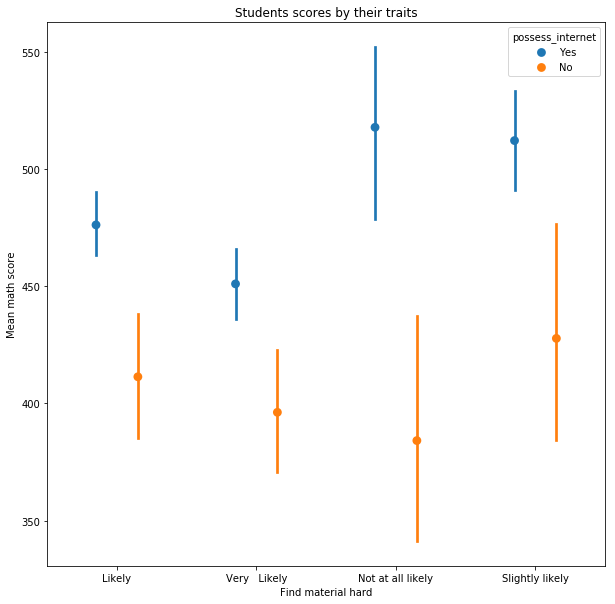

In [104]:
plt.figure(figsize=[10,10])
ax = sb.pointplot(data = t_student_2, x = 'material_hard', y = 'm_score', hue = 'possess_internet',
                  dodge = 0.3, linestyles = "");
plt.ylabel('Mean math score')
plt.xlabel('Find material hard');
plt.title('Students scores by their traits');

Students who have access to internet but perceive that material is harder are scoring better scores than who do not have 
access to internet and perceive the material hard.

In [105]:
t_student_3 = teacher_student_subset.groupby(['country', 'student_id', 
                                              'motiv_forfuture',
                                              'school_doeslittle'])['math_score_y'].mean().reset_index(name='m_score')

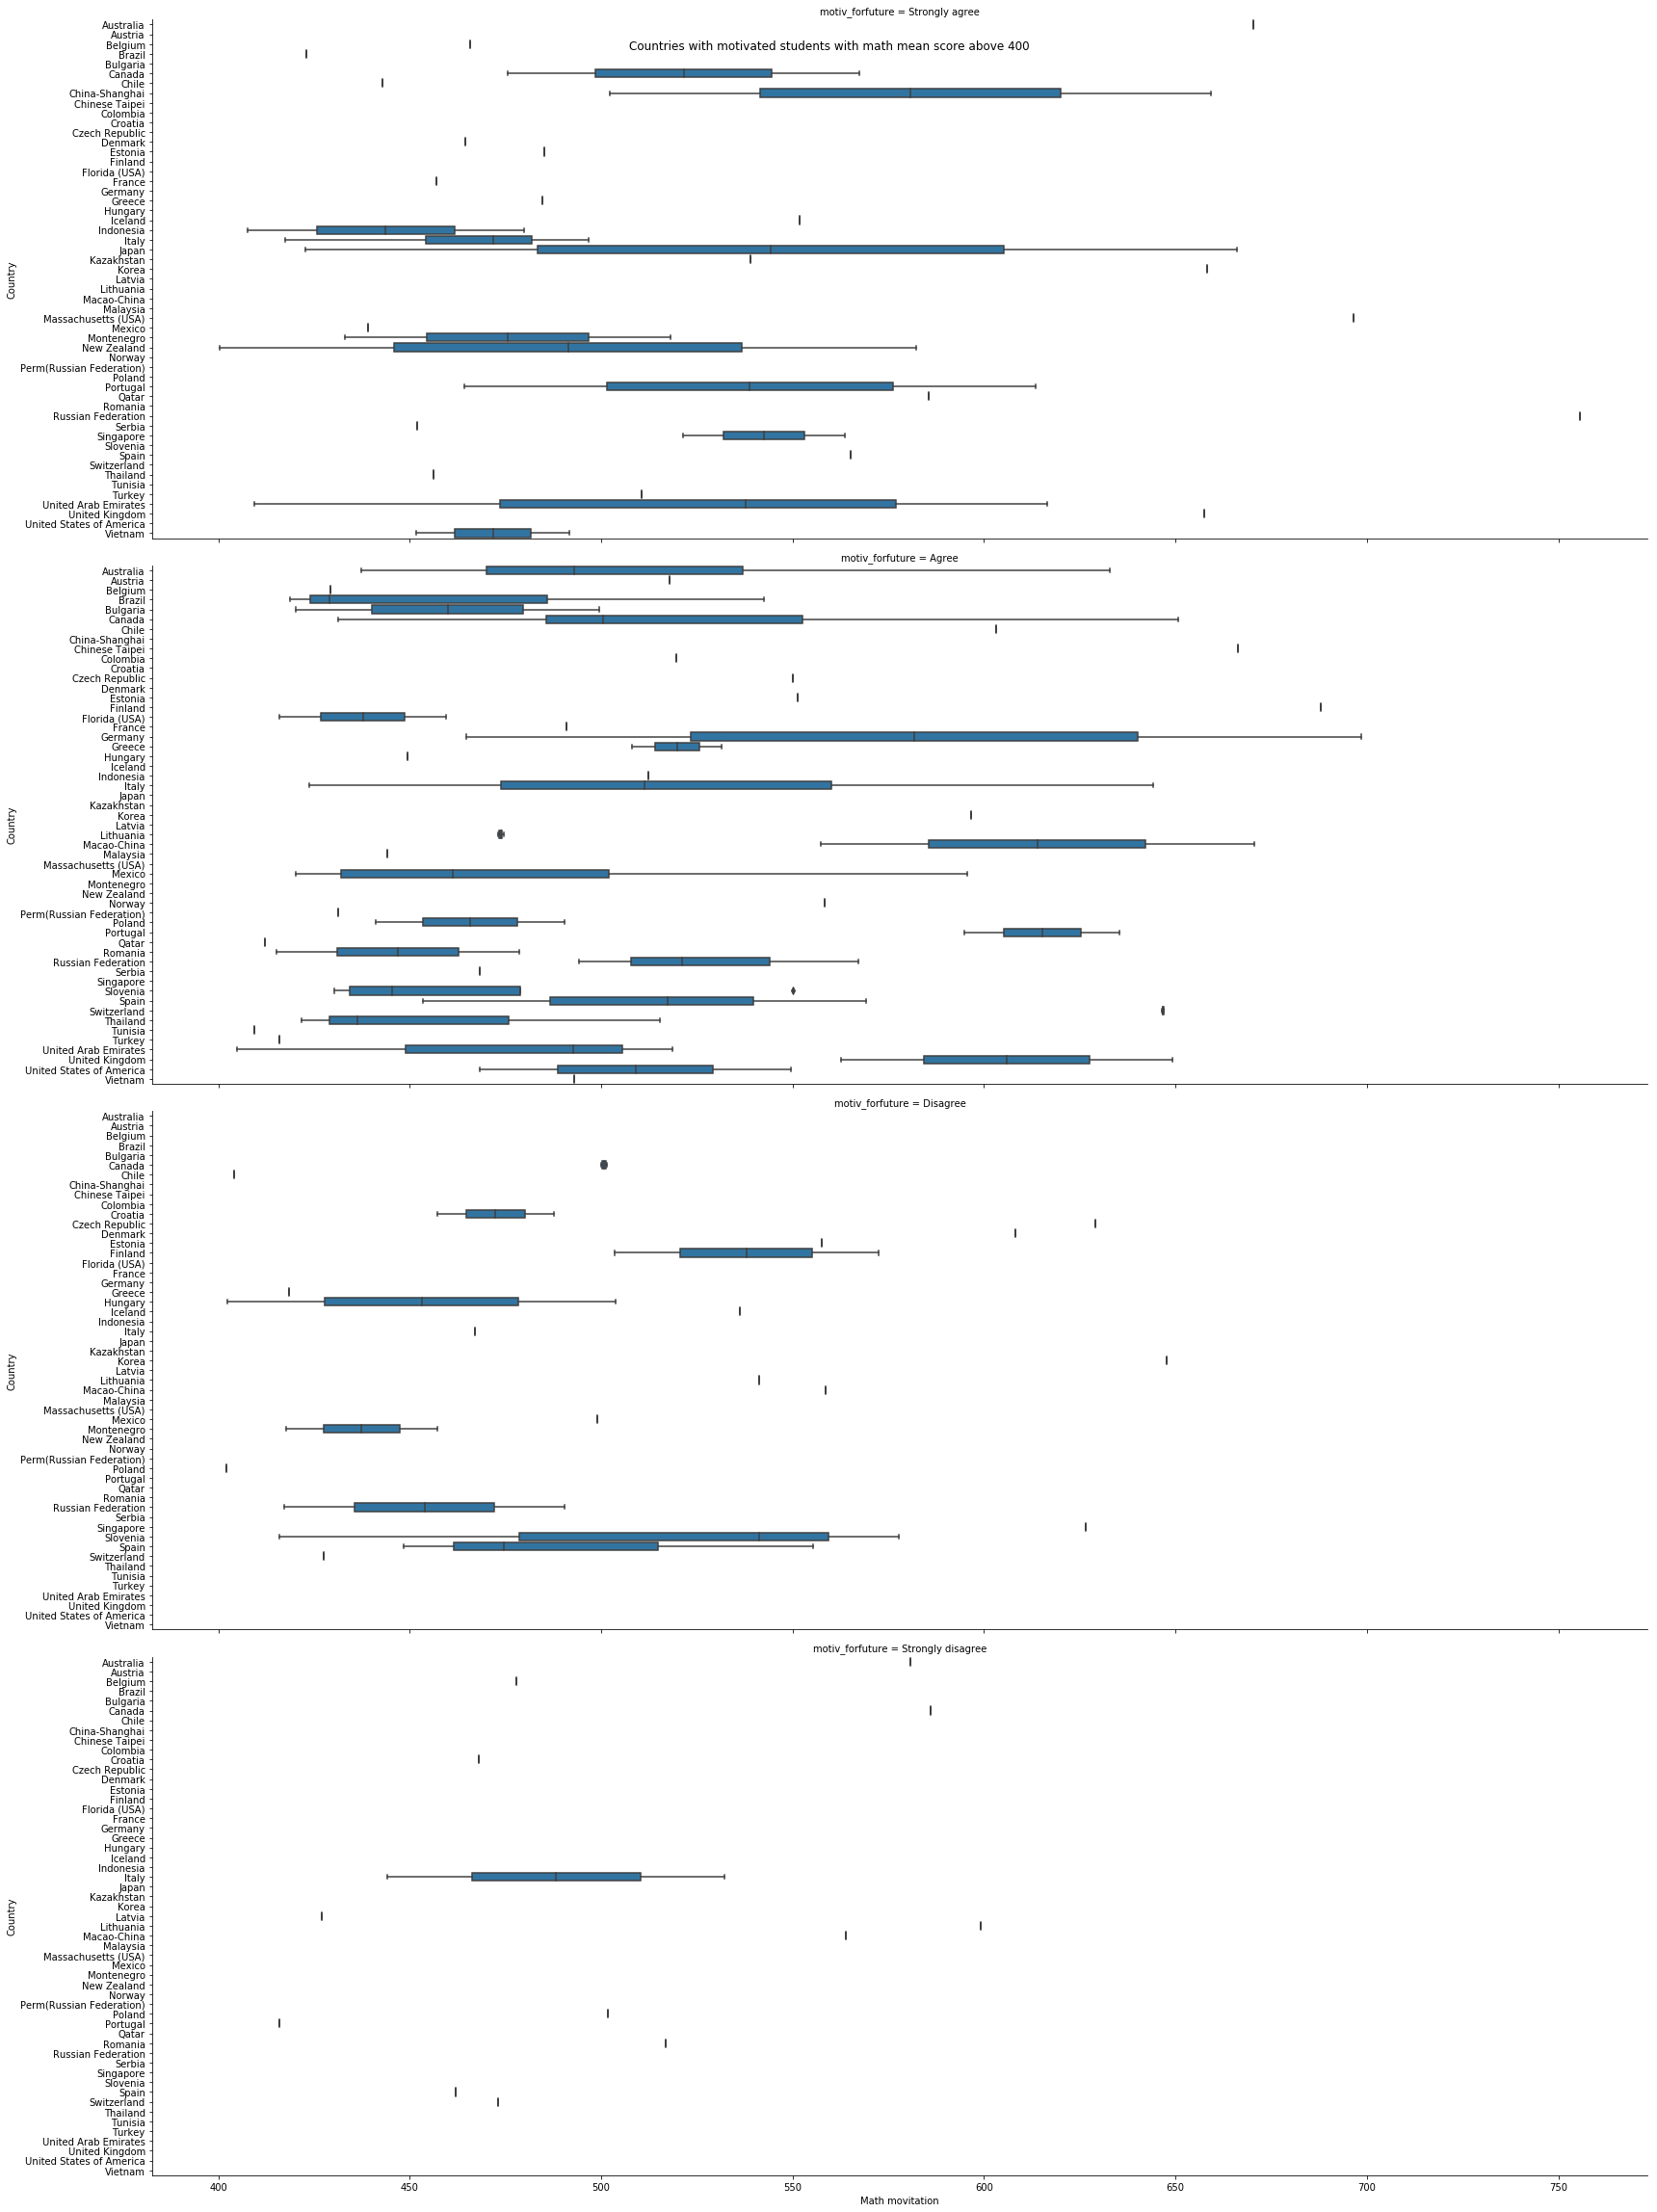

In [106]:
g = sb.factorplot(x="m_score", y="country", row="motiv_forfuture",
                kind="box", orient="h",  aspect=3, size = 8, color = base_color,
                data= t_student_3.query("m_score > 400"));
g.set_axis_labels('Math movitation', 'Country');
plt.suptitle('Countries with motivated students with math mean score above 400');

Countries where students strongly motivated for future by studying math are  China-shanghai, New Zealand , Japan
Poland, United Arab Emirates as well.


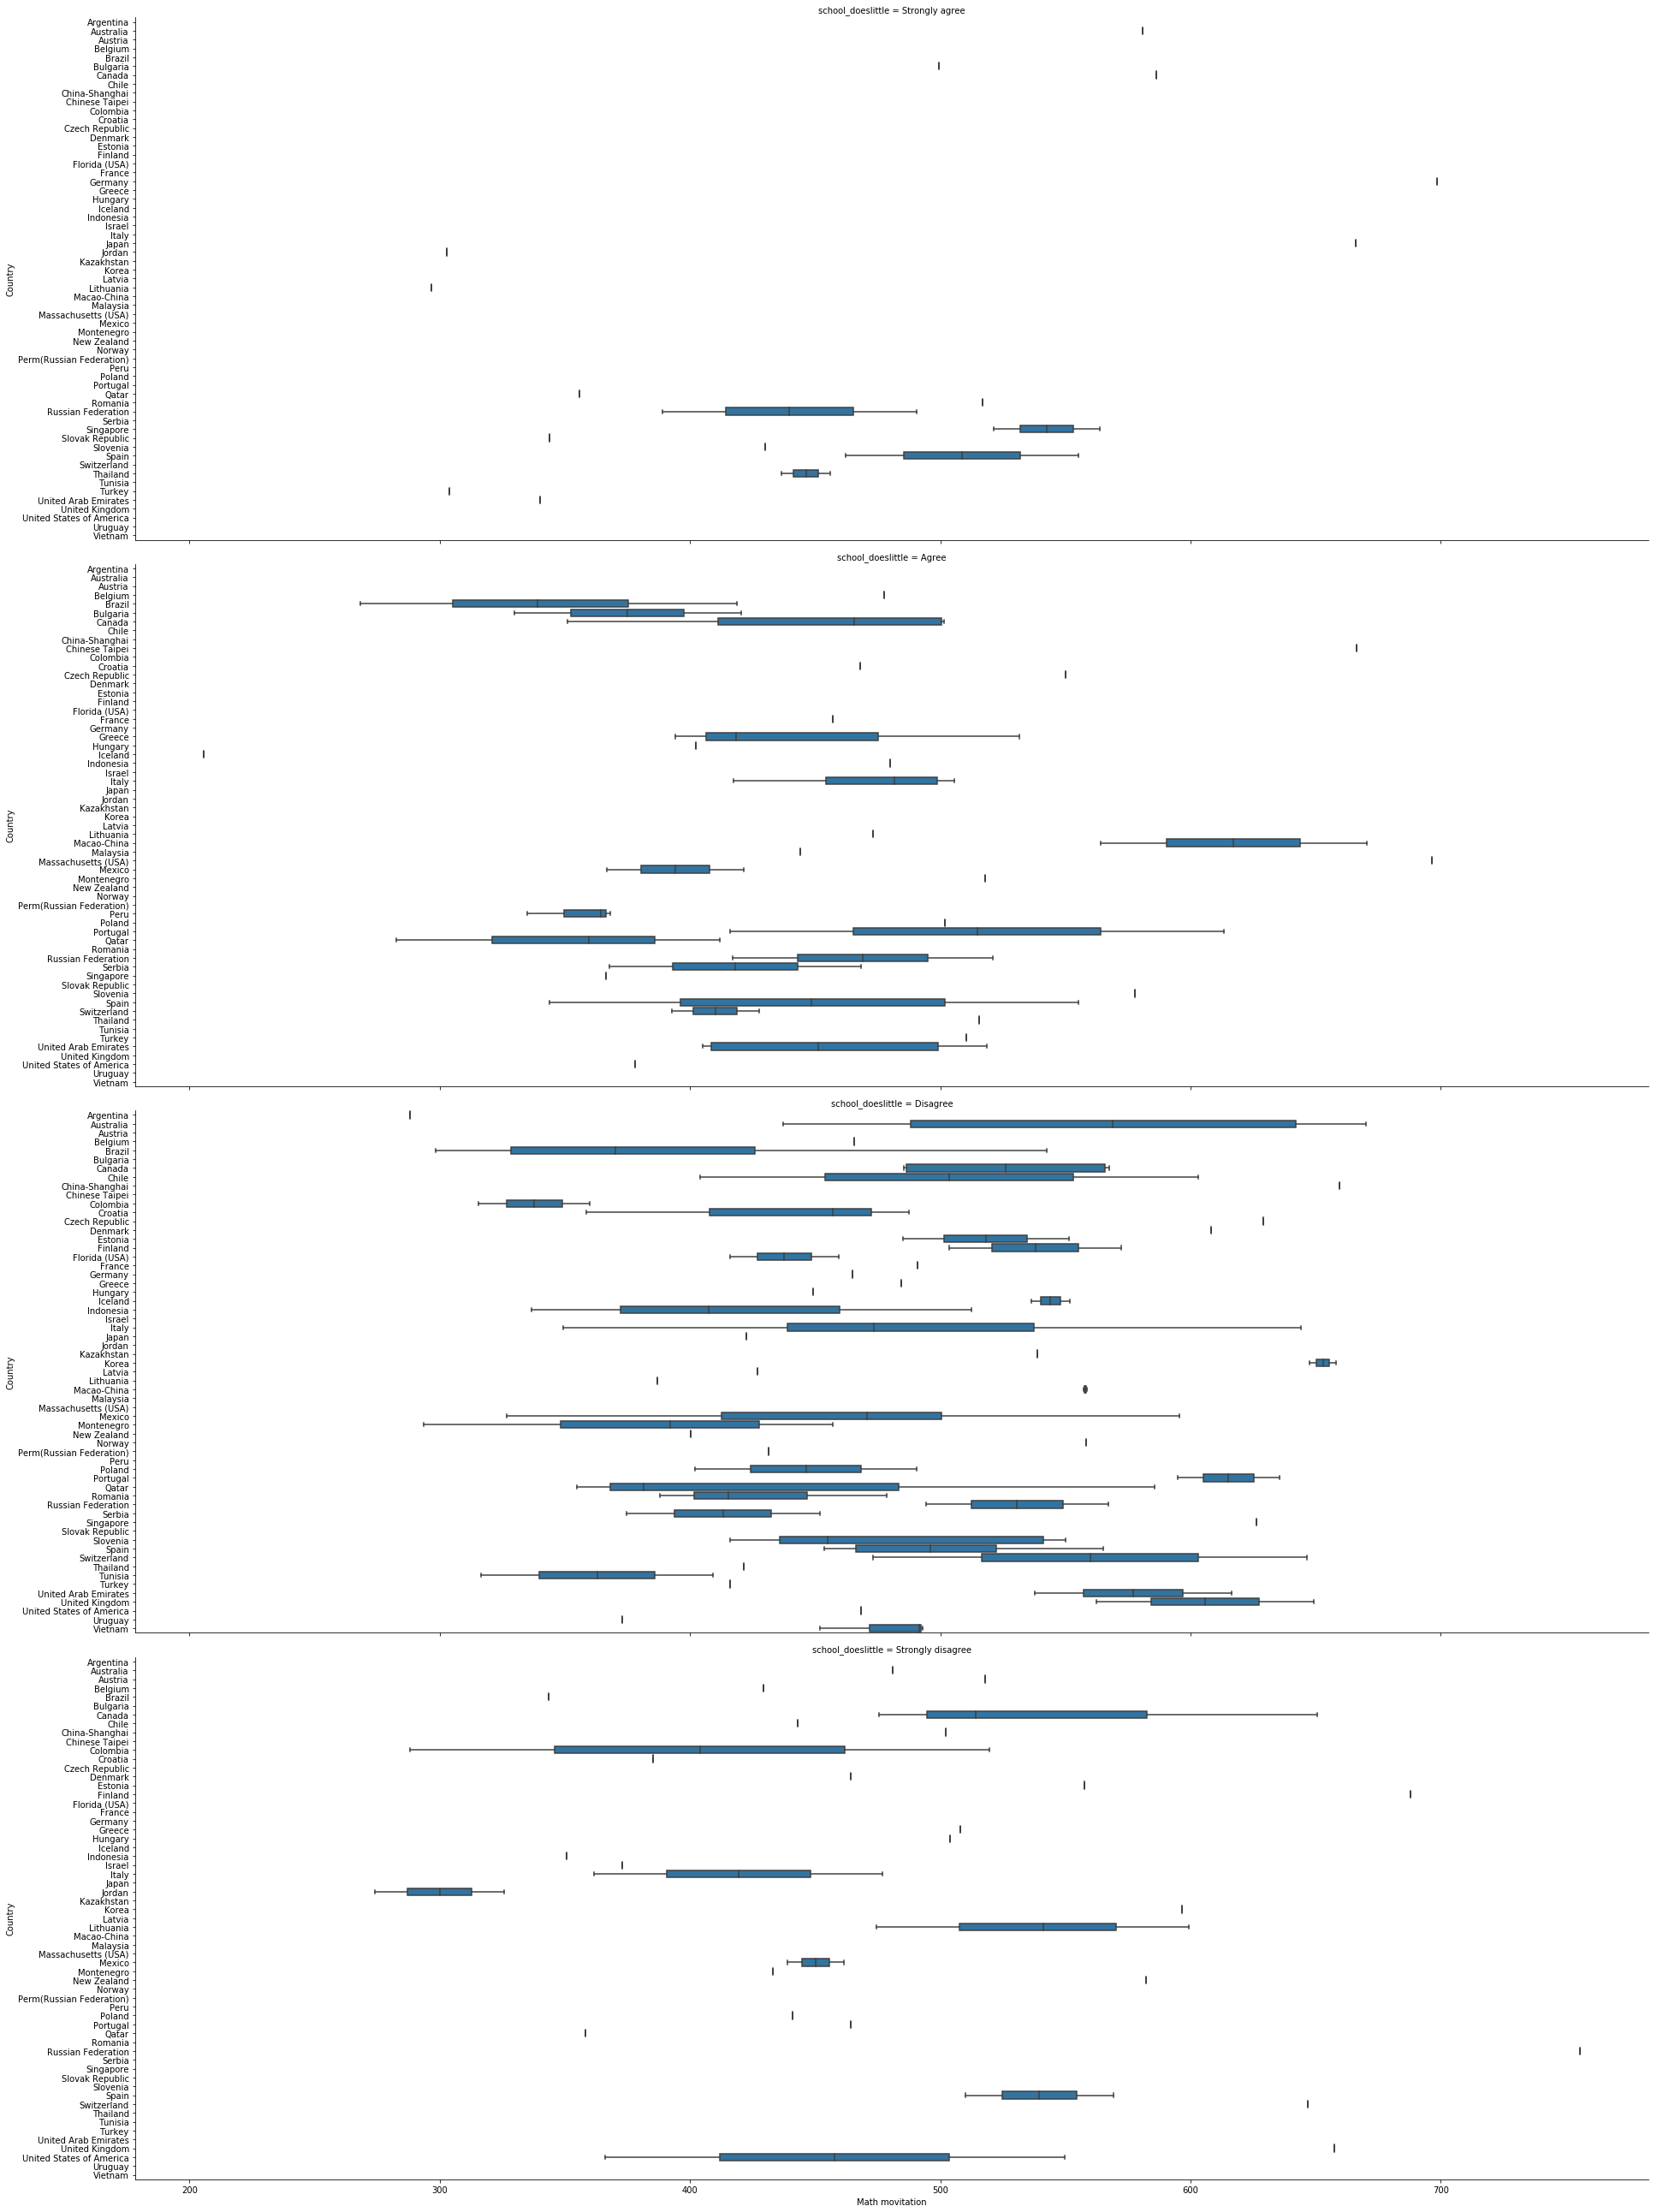

In [110]:
g = sb.factorplot(x="m_score", y="country", row="school_doeslittle",
                kind="box", orient="h",  aspect=3, size = 9, color = base_color,
                data= t_student_3.query("m_score >=200"));

g.set_axis_labels('Math movitation', 'Country');
#g.set_titles('Countries with motivated students with math mean score above 200');

There are very few countries where students think that school does a little to prepare them for future.
Of these most data are seen in Russian Federation,Brazil, Chinese-Taipei, Germany  Japan, Massachucets(USA), Macao-China
having the high math scores who also agree on this feature. The countries Columbia ,Iceland, Qatar have their minimum  less than 300 who also agree that school does a little for the future.

Below I further narrowed down my analysis to another question: What are some of the features different between the high scoring countries and low scoring countries?

In [137]:
#Collect the features in a list to look at the difference

t_student_6 = teacher_student_subset[['country', 'student_id', 
                                              'motiv_forfuture',
                                              'school_doeslittle','mother_jobstatus','perseve_giveup',
                                             'extra_study', 'matint_enjoys','lesson_outside','min_classperiod',
                                             'ask_forexplains', 'encourage_think',
                                             'possess_internet', 'math_score_y']]


In [176]:
t6 = t_student_6.groupby(['country', 'student_id', 
                                              'mother_jobstatus',
                                              'possess_internet'])['math_score_y'].mean().reset_index(name='math')

In [299]:
#Look at some of the high scoring countries with these features
high_country= t6.query('country == "Australia" |country =="China-Shanghai" | country =="Korea"')

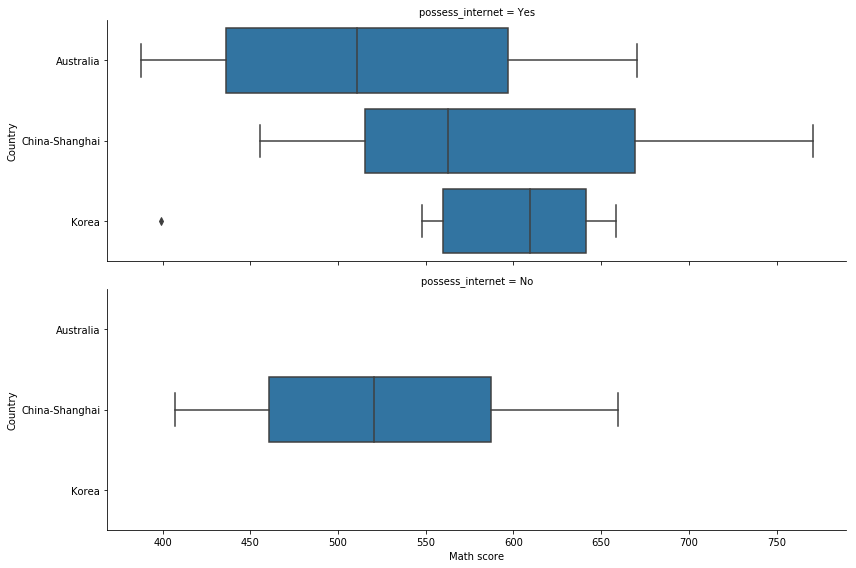

In [300]:
g = sb.factorplot(x="math", y="country", row="possess_internet",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= high_country);

g.set_axis_labels('Math score', 'Country');

All the three high scoring countries show students having internet access score between 450 and 600, China-Shanghai with the maximum high score though it also shows data where students have no internet but still the median score is above 500.

In [200]:
# Low scoring countries
low_country = t6.query('country == "Qatar" |country =="Indonesia" | country =="Iceland"')


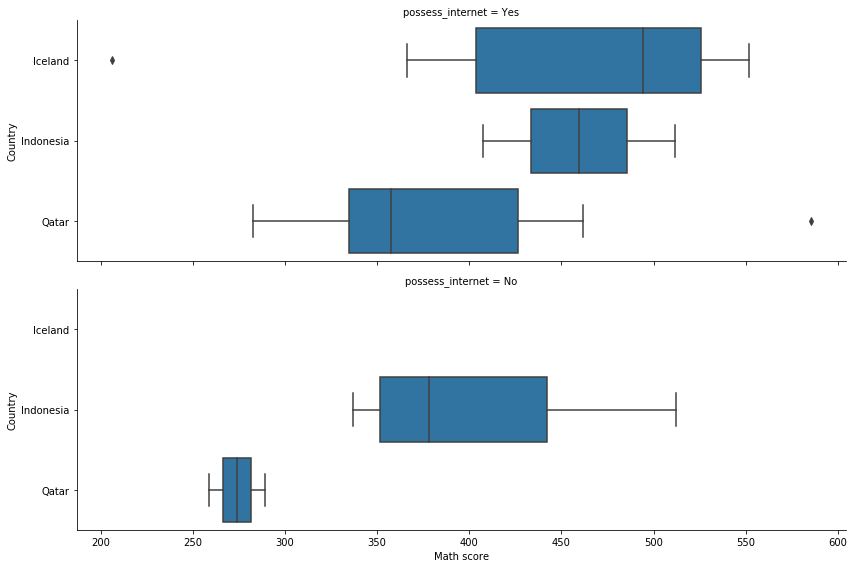

In [201]:
g = sb.factorplot(x="math", y="country", row="possess_internet",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= low_country);

g.set_axis_labels('Math score', 'Country');

Of the low scoring countries above more students in Indonesia don't have internet access  and Qatar had very small number of students with no internet access. In both cases, the median score is very low than when they do have internet access.
Iceland shows no data for no internet.

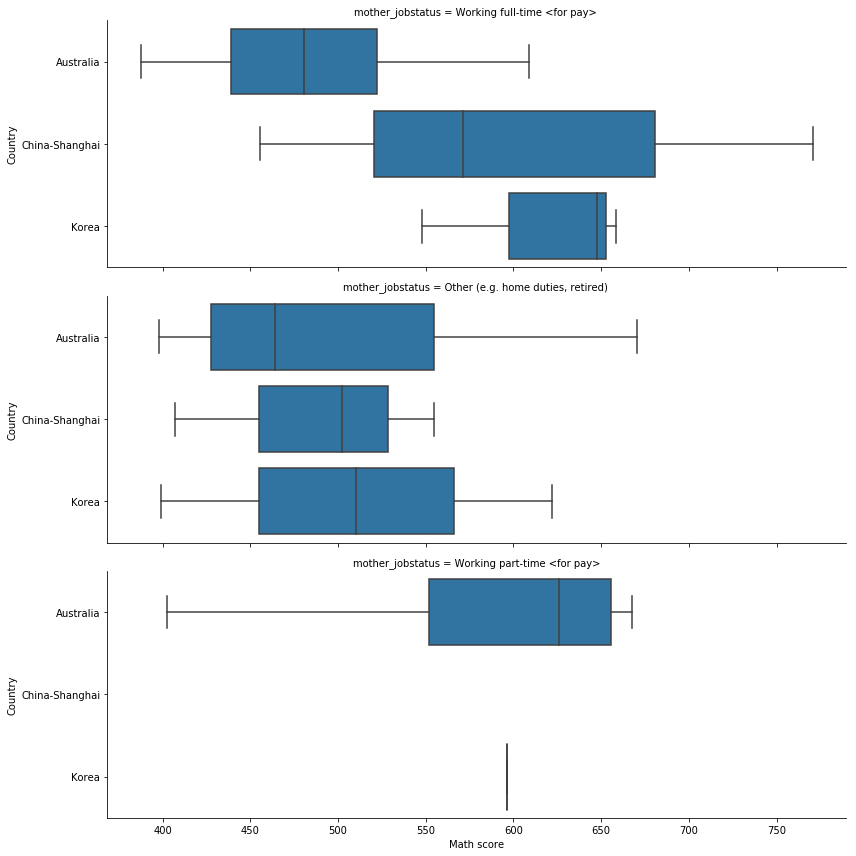

In [301]:
g = sb.factorplot(x="math", y="country", row="mother_jobstatus",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= high_country);

g.set_axis_labels('Math score', 'Country');

More data is seen for working moms for China-Shanghai and no data for  it is seen otherwise; it has the highest score as well than Australia and Korea. Australia shows some data with part time working moms but the median score is above 600 in this case. No data is seen for non working status for China, Korea and only one data point here.

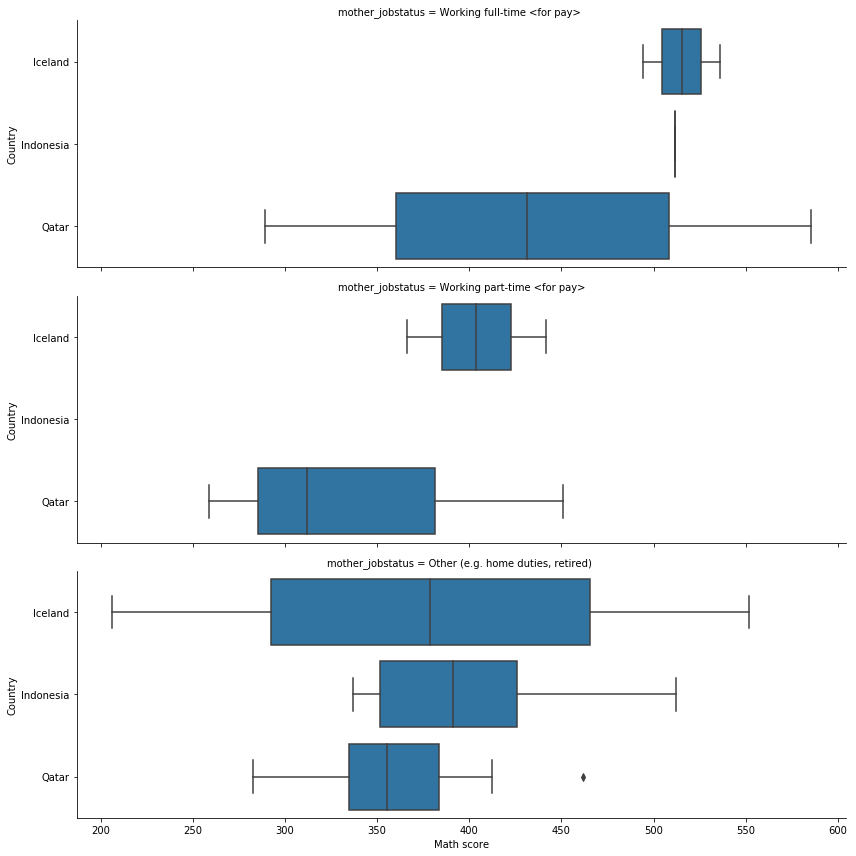

In [203]:
g = sb.factorplot(x="math", y="country", row="mother_jobstatus",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= low_country);

g.set_axis_labels('Math score', 'Country');

Iceland has small data for working moms although its median score is higher than the others in this scenario. Qatar shows 
more data that is spread out in this case. Iceland has more spread out data interms of math scores with non working moms than Indonesia and Qatar. 

In general we can say that the high scoring countries have greater number of full time working mothers than the low scoring countries.

# Relationships observed in the multivariate explorations

The optimum number of math classes for which the scores were better are between 4 or 5 classes per week; with the duration being 
45 to 50 minutes as the optimum time for good scores for majority of the data for score as high as 700. The highest scorers being the 
female students. The students seem to score better when teacher helps learn from mistakes for anxious students. There are smart students
who do better even without teacher's support. Students who think the material is harder and have access to internet score better than who don't.
Countries like Spain, Russia, Japan, Maco-China show more data with students strongly motivated for future by learning math and show maxinum scores above 400.
Few countries show data where students don't think that school is important for future purposes are countries like
 Russia, Brazil, parts of USA(Massachucets), Iceland, Maco-China, Columbia, Qatar; still scoring high on math scores are Massachucets(USA), Macao-China.
Comparing the countries whose median math score was above to those that have median score below 400, I found that the high scoring countries showed high number of students with  internet access and large data points showing  full time working status for moms  than the low scoring counries of which Indonesia showed the large number of students not having internet access and Iceland showing more non working moms.


Features that strengthened each other for these analyses are the student math anxiety, student perseverance, student openness to problem solving and teacher support. We saw that students with anxiety were high in number but seem to persevere and do better with teacher help.

# Surprising interactions between features
A surprising interaction I found is that students with part time working or non working parents had a better perserance attitude than for students with full time working parents. So these students might be more aware and may work harder for their furure.
Secondly, Students who have math anxiety show stronger perseverance and do not give up although the scores were variable in this case. Another interesting interaction I found that among the high scoring countries like China-Shanghai, there are  lot of data who don't show having access to internet but still score higher than others with no internet.